#**Used cars Prediction case study using Linear Regression**

##Context
- To explore, treat and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

##Objective
- To preprocess the raw data, Exploratory Data Analysis, Data pre-processing and build a linear regression model and evaluate to predict the prices of used cars.

##Key Question
- What are the key factors influencing the price of an used car?
- Is there a good predictive model for the prices of an used cars?
- What does the performance assessment look like for such a model?

##Data Information
Each record in the database provides a description of an UsedCars. A detailed data dictionary can be found below.

##Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs-

##**1. Loading libraries**

In [ ]:
## Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



##**2. Loading and exploring the data**

In [ ]:
# let colab access my google drive and upload file
from google.colab import files
files.upload()


Saving used_cars_data.csv to used_cars_data (1).csv


{'used_cars_data (1).csv': b'S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price\r\n0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,5.51,1.75\r\n1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,16.06,12.5\r\n2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61,4.5\r\n3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,11.27,6\r\n4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,53.14,17.74\r\n5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5,10.25,2.35\r\n6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5,9.47,3.5\r\n7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,

In [ ]:
data = pd.read_csv('used_cars_data.csv')

In [ ]:
# let's view a sample of the data
data.sample(
    5, random_state=2
)  # setting the random_state will ensure we get the same results every time


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,7.15,6.64
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,7.88,3.90
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,10.25,4.79
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,40.62,13.50


In [ ]:
# checking for duplicate values in the data
print("There are ", data.duplicated().sum(), "duplicate values in the data")


There are  0 duplicate values in the data


In [ ]:
# checking the names of the columns in the data
print(data.columns)


Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [ ]:
# checking column datatypes and number of non-null values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [ ]:
# checking for missing values in the data.
data.isnull().sum()


,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
# Let's look at the statistical summary of the data
data.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**3. Data Preprocessing**

In [ ]:
# creating a copy of the dataFrame so that original data remains unchanged
df = data.copy()


In [ ]:
# checking the names of the columns in the data
print("Total Columns of DataFrame: \n",df.columns)

df.drop(['S.No.'],axis=1,inplace=True)

# checking the names of the columns in the data frame after dropping S.No.
print("\n Columns of DataFrame after dropping S.No: \n",df.columns)


Total Columns of DataFrame: 
 Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

 Columns of DataFrame after dropping S.No: 
 Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [ ]:
df.Name.value_counts()


,count
Name,
Mahindra XUV500 W8 2WD,55
Maruti Swift VDI,49
Maruti Swift Dzire VDI,42
Honda City 1.5 S MT,39
Maruti Swift VDI BSIV,37
...,...
Mercedes-Benz E-Class E240 V6 AT,1
Nissan Terrano XE 85 PS,1
Mahindra TUV 300 2015-2019 T8 AMT,1


In [ ]:
#split the column values by space " "
Namewrk = df["Name"].str.split(" ", n = 1, expand = True)
Namewrk.head()


,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


In [ ]:
#add new column to Data Frame and drop Name column
df.drop(['Name'], axis=1, inplace=True)
#convert the DType as category
df["Name_Brand"]= Namewrk[0].astype('category')

del Namewrk  # don't need to do this but can keep things tidy
df.head(5)


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi


In [ ]:
df.Name_Brand.value_counts()


,count
Name_Brand,
Maruti,1444
Hyundai,1340
Honda,743
Toyota,507
Mercedes-Benz,380
Volkswagen,374
Ford,351
Mahindra,331
BMW,312


In [ ]:
df[df['Name_Brand'].isin(['ISUZU','Isuzu'])]


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
2900,Jaipur,2017,34429,Diesel,Automatic,First,13.8 kmpl,2999 CC,174.57 bhp,7.0,33.68,20.00,Isuzu
3624,Coimbatore,2018,20422,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,33.68,16.09,ISUZU
5979,Jaipur,2017,25000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,33.68,8.00,ISUZU
6470,Kolkata,2016,45000,Diesel,Manual,First,12.08 kmpl,2999 CC,161 bhp,7.0,33.68,NaN,Isuzu
6919,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,33.68,NaN,ISUZU


In [ ]:
# Replacing a different sensitive case string;
df['Name_Brand'] = df['Name_Brand'].replace('ISUZU', 'Isuzu')
print("Unique Brand values:\n", df.Name_Brand.unique())

df[df['Name_Brand'].isin(['ISUZU','Isuzu'])]


Unique Brand values:
 ['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', ..., 'Force', 'Bentley', 'Lamborghini', 'Hindustan', 'OpelCorsa']
Length: 32
Categories (32, object): ['Ambassador', 'Audi', 'BMW', 'Bentley', ..., 'Tata', 'Toyota', 'Volkswagen',
                          'Volvo']


/tmp/ipython-input-241083889.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Name_Brand'] = df['Name_Brand'].replace('ISUZU', 'Isuzu')


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
2900,Jaipur,2017,34429,Diesel,Automatic,First,13.8 kmpl,2999 CC,174.57 bhp,7.0,33.68,20.00,Isuzu
3624,Coimbatore,2018,20422,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,33.68,16.09,Isuzu
5979,Jaipur,2017,25000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,33.68,8.00,Isuzu
6470,Kolkata,2016,45000,Diesel,Manual,First,12.08 kmpl,2999 CC,161 bhp,7.0,33.68,NaN,Isuzu
6919,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,33.68,NaN,Isuzu


In [ ]:
#Check for any null values
print("Null values in Location column: ", df['Location'].isnull().sum())
#convert the Dtype to category
df["Location"] = df["Location"].astype('category')
print("Unique values of Location: \n", df.Location.unique())
df[df['Location'] == ""]


Null values in Location column:  0
Unique values of Location: 
 ['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', ..., 'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad']
Length: 11
Categories (11, object): ['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', ..., 'Kochi', 'Kolkata',
                          'Mumbai', 'Pune']


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand


In [ ]:
print ("Year \n",df.Year.unique())
print ("Kilometers_Driven \n",df.Kilometers_Driven.unique())
print("Empty values of Kilometers_Driven \n", df[df['Kilometers_Driven'] == 0])
print("Empty values of Year \n", df[df['Year'] == 0])
df.Kilometers_Driven.describe()


Year 
 [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]
Kilometers_Driven 
 [72000 41000 46000 ... 89411 52262 72443]
Empty values of Kilometers_Driven 
 Empty DataFrame
Columns: [Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price, Name_Brand]
Index: []
Empty values of Year 
 Empty DataFrame
Columns: [Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price, Name_Brand]
Index: []


,Kilometers_Driven
count,7.253000e+03
mean,5.869906e+04
std,8.442772e+04
min,1.710000e+02
25%,3.400000e+04
50%,5.341600e+04
75%,7.300000e+04
max,6.500000e+06


In [ ]:
print("Max value of Kilometers_Driven: ", df.Kilometers_Driven.max())

print("check cars of Kilometers_Driven > 1000000(1000K): ")
df[df.Kilometers_Driven > 1000000]


Max value of Kilometers_Driven:  6500000
check cars of Kilometers_Driven > 1000000(1000K): 


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,55.07,65.0,BMW


In [ ]:
print("Total null values of Kilometers_Driven ", df.Kilometers_Driven.isnull().sum())
#convert the values of ['Kilometers_Driven'] > 1000000 to null
df.loc[df['Kilometers_Driven'] > 1000000, ['Kilometers_Driven']]= np.nan
print("Total null values of Kilometers_Driven after treating ['Kilometers_Driven'] > 1000000 ", df.Kilometers_Driven.isnull().sum())


Total null values of Kilometers_Driven  0
Total null values of Kilometers_Driven after treating ['Kilometers_Driven'] > 1000000  1


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7252.0,57810.852868,37499.537277,171.00,34000.00,53404.00,73000.00,775000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


In [ ]:
#convert the Dtype to category
df["Fuel_Type"] = df["Fuel_Type"].astype('category')
print("Fuel_Type \n", df.Fuel_Type.unique())
df["Transmission"] = df["Transmission"].astype("category")
print("Transmission \n", df.Transmission.unique())
df["Owner_Type"] = df["Owner_Type"].astype("category")
print("Owner_Type \n", df.Owner_Type.unique())


Fuel_Type 
 ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']
Categories (5, object): ['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol']
Transmission 
 ['Manual', 'Automatic']
Categories (2, object): ['Automatic', 'Manual']
Owner_Type 
 ['First', 'Second', 'Fourth & Above', 'Third']
Categories (4, object): ['First', 'Fourth & Above', 'Second', 'Third']


In [ ]:
#split the column values by space " "
Milwrk = df["Mileage"].str.split(" ", n = 1, expand = True)
print(" Mileage Unit: ", Milwrk[1].unique())
del Milwrk  # don't need to do this but can keep things tidy
df.head(5)


 Mileage Unit:  ['km/kg' 'kmpl' nan]


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
0,Mumbai,2010,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti
1,Pune,2015,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi


In [ ]:
#method to replace units with spaces
#convert the DType as float
def mil_conv(mil_var):
    if isinstance(mil_var,str):
        if (mil_var.endswith('km/kg')):
            return float(mil_var.replace('km/kg', ""))
        elif(mil_var.endswith('kmpl')):
            return float(mil_var.replace('kmpl', ""))
        else:
            return float(np.nan)
    elif(mil_var == 0):
        return np.nan
    else:
        return mil_var

df['Mileage'] = df['Mileage'].apply(mil_conv)
df.sample(5)


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
664,Jaipur,2008,170000.0,Diesel,Manual,Second,16.80,1493 CC,110 bhp,5.0,14.255,1.50,Hyundai
3611,Kochi,2011,94832.0,Petrol,Manual,First,17.00,1497 CC,118 bhp,5.0,13.580,3.83,Honda
2948,Coimbatore,2018,10714.0,Diesel,Automatic,First,19.27,2143 CC,167.62 bhp,5.0,49.490,39.51,Mercedes-Benz
797,Mumbai,2017,26000.0,Diesel,Manual,First,23.65,1248 CC,88.5 bhp,5.0,7.880,9.75,Maruti
4353,Hyderabad,2009,147000.0,Diesel,Manual,First,12.99,2494 CC,100.6 bhp,7.0,24.010,7.50,Toyota


In [ ]:
#check for no Mileage data
df.loc[df['Mileage']==0]


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
14,Pune,2012,85000.0,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,120.000,17.50,Land
67,Coimbatore,2019,15369.0,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,49.140,35.67,Mercedes-Benz
79,Hyderabad,2005,87591.0,Petrol,Manual,First,0.0,1086 CC,NaN,5.0,4.550,1.30,Hyundai
194,Ahmedabad,2007,60006.0,Petrol,Manual,First,0.0,NaN,NaN,NaN,13.580,2.95,Honda
229,Bangalore,2015,70436.0,Diesel,Manual,First,0.0,1498 CC,99 bhp,NaN,7.650,3.60,Ford
262,Hyderabad,2006,99000.0,Petrol,Manual,First,0.0,1086 CC,NaN,5.0,4.550,1.75,Hyundai
307,Chennai,2006,58000.0,Petrol,Manual,Second,0.0,1086 CC,NaN,5.0,4.550,1.50,Hyundai
424,Hyderabad,2010,42021.0,Diesel,Manual,First,0.0,1968 CC,NaN,5.0,10.150,5.45,Volkswagen
443,Coimbatore,2012,50243.0,Petrol,Manual,First,0.0,1086 CC,NaN,5.0,4.550,3.35,Hyundai
544,Kochi,2019,13190.0,Petrol,Automatic,First,0.0,1950 CC,181.43 bhp,5.0,49.490,38.99,Mercedes-Benz


In [ ]:
print ("Mileage null values before converting 0 to null: ", df['Mileage'].isnull().sum())
#method call to convert 0 to null
df['Mileage'] = df['Mileage'].apply(mil_conv)
print ("Mileage null values after converting 0 to null: ", df['Mileage'].isnull().sum())
#check for no Mileage data
df.loc[df['Mileage']==0]


Mileage null values before converting 0 to null:  2
Mileage null values after converting 0 to null:  83


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand


In [ ]:
#split the column values by space " "
Engwrk = df["Engine"].str.split(" ", n = 1, expand = True)
print("Engine Units: ",Engwrk[1].unique())
del Engwrk


Engine Units:  ['CC' nan]


In [ ]:
#method to replace units with spaces
#convert the DType as float
def eng_conv(eng_var):
    if isinstance(eng_var,str):
        if (eng_var.endswith('CC')):
            return float(eng_var.replace('CC', ""))
        elif(eng_var == '0.0'):
            return np.nan
        else:
            return float(np.nan)
    elif(eng_var == 0):
        return np.nan
    else:
        return eng_var


df['Engine'] = df['Engine'].apply(eng_conv)

#check for no Engine data
print("Engine wiith no data(0) \n", df.loc[df['Mileage']==0])
df.head(5)


Engine wiith no data(0) 
 Empty DataFrame
Columns: [Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price, Name_Brand]
Index: []


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
0,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,5.51,1.75,Maruti
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,8.61,4.50,Honda
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,53.14,17.74,Audi


In [ ]:
#Engine null values
print ("Engine null values after convertion: ", df['Engine'].isnull().sum())


Engine null values after convertion:  46


In [ ]:
#split the column values by space " "
Powwrk = df["Power"].str.split(" ", n = 1, expand = True)
print("Power Units: ",Powwrk[1].unique())
del Powwrk


Power Units:  ['bhp' nan]


In [ ]:
#convert the DType as float
def pow_conv(pow_var):
    if isinstance(pow_var,str):
        if (pow_var.endswith('bhp')):
            return float(pow_var.replace('bhp', ""))
        else:
            return float(np.nan)
    elif(pow_var == 0):
        return np.nan
    else:
        return pow_var

df['Power'] = df['Power'].apply(pow_conv)
#check for no Power data
print("Power with no data(0) \n", df.loc[df['Power']==0])
df.head(5)


Power with no data(0) 
 Empty DataFrame
Columns: [Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price, Name_Brand]
Index: []


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
0,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi


In [ ]:
#Seats dtype is float, check for no Seats data
print("Seats with no data(0): \n")

df[df['Seats']==0]


Seats with no data(0): 



,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand
3999,Hyderabad,2012,125000.0,Petrol,Automatic,First,10.5,3197.0,NaN,0.0,53.14,18.0,Audi


In [ ]:
#method to convert 0seats to null
def seat_conv(seat_var):
    if(seat_var == 0):
        return np.nan
    else:
        return seat_var


In [ ]:
#convert 0 to a null value
print ("Seats null values before converting 0 to null: ", df['Seats'].isnull().sum())
#method call to convert 0 to null
df['Seats'] = df['Seats'].apply(seat_conv)
print ("Seats null values after converting 0 to null: ", df['Seats'].isnull().sum())
#check for no Seats data
df.loc[df['Seats']==0]


Seats null values before converting 0 to null:  53
Seats null values after converting 0 to null:  54


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand


In [ ]:
#check for 0 values
df.loc[df['New_Price']==0]


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand


In [ ]:
#check if any cars have New Price < Used car Price
df.loc[df['New_Price'] < df['Price']].value_counts()

df_diff = df[df['New_Price'] < df['Price']]
print("count of data where New_Price < Price(Used car Price): ",df_diff.New_Price.count())
print("Group by Owner_Type: \n",df_diff.groupby("Owner_Type")["Name_Brand"].count())


count of data where New_Price < Price(Used car Price):  73
Group by Owner_Type: 
 Owner_Type
First             67
Fourth & Above     0
Second             5
Third              1
Name: Name_Brand, dtype: int64


/tmp/ipython-input-286446706.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Group by Owner_Type: \n",df_diff.groupby("Owner_Type")["Name_Brand"].count())


In [ ]:
#check for 0 values
df.loc[df['Price']==0]


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Brand


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7252 non-null   float64 
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7170 non-null   float64 
 7   Engine             7207 non-null   float64 
 8   Power              7078 non-null   float64 
 9   Seats              7199 non-null   float64 
 10  New_Price          7253 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Name_Brand         7253 non-null   category
dtypes: category(5), float64(7), int64(1)
memory usage: 491.1 KB


##**4. Feature Engineering**

In [ ]:
df.Name_Brand.unique()


['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', ..., 'Force', 'Bentley', 'Lamborghini', 'Hindustan', 'OpelCorsa']
Length: 32
Categories (32, object): ['Ambassador', 'Audi', 'BMW', 'Bentley', ..., 'Tata', 'Toyota', 'Volkswagen',
                          'Volvo']

In [ ]:
# Average Price of the cars
df.groupby(['Name_Brand'])['Price'].mean().sort_values(ascending=False)


/tmp/ipython-input-1785452748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Name_Brand'])['Price'].mean().sort_values(ascending=False)


,Price
Name_Brand,
Lamborghini,120.000000
Bentley,59.000000
Porsche,48.348333
Land,39.259500
Jaguar,37.632250
Mini,26.896923
Mercedes-Benz,26.809874
Audi,25.537712
BMW,25.243146


In [ ]:
# Lets categerize cars based on average Price as ['Other', 'Regular', 'Premium', 'Luxury', 'Executive']
Brand_type = {
'Lamborghini':'Executive','Bentley':'Executive','Porsche':'Executive','Land':'Executive','Jaguar':'Executive',
'Mini':'Premium','Mercedes-Benz':'Premium','Audi':'Premium','BMW' :'Premium' ,
'Volvo':'Luxury' ,'Jeep':'Luxury','Isuzu':'Luxury','Toyota':'Luxury','Mitsubishi':'Luxury',
'Force':'Regular','Mahindra':'Regular','Skoda':'Regular','Ford':'Regular','Renault':'Regular','Honda':'Regular','Hyundai':'Regular','Volkswagen':'Regular',
'Nissan':'Other','Maruti':'Other','Tata':'Other','Fiat':'Other','Datsun':'Other','Chevrolet':'Other','Smart':'Other','Ambassador':'Other','Hindustan':'Other','OpelCorsa':'Other'
}


In [ ]:
# Reducing the number of categories in `Name_Brand` feature
df['Name_Brand'] = df['Name_Brand'].map(Brand_type).astype("category")
df.Name_Brand.unique()


['Other', 'Regular', 'Premium', 'Luxury', 'Executive']
Categories (5, object): ['Executive', 'Luxury', 'Other', 'Premium', 'Regular']

In [ ]:
df.Location.unique()


['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', ..., 'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad']
Length: 11
Categories (11, object): ['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', ..., 'Kochi', 'Kolkata',
                          'Mumbai', 'Pune']

In [ ]:
df.groupby(['Location'])['Price'].mean().sort_values(ascending=False)


/tmp/ipython-input-3256654692.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Location'])['Price'].mean().sort_values(ascending=False)


,Price
Location,
Coimbatore,15.078223
Bangalore,13.328631
Kochi,11.179186
Hyderabad,9.776550
Delhi,9.707726
Mumbai,9.429329
Ahmedabad,8.457321
Chennai,7.753623
Pune,6.726254


In [ ]:
# Lets categerize cars based on average Price as ['Tier2', 'Tier3', 'Tier1']
Loc_type = {
'Coimbatore' : 'Tier1',
'Bangalore':'Tier1',
'Kochi':'Tier1',
'Hyderabad':'Tier2',
'Delhi':'Tier2',
'Mumbai':'Tier2',
'Ahmedabad':'Tier2',
'Chennai':'Tier2',
'Pune':'Tier3' ,
'Jaipur':'Tier3',
'Kolkata':'Tier3'
}


In [ ]:
# Reducing the number of categories in `Location` feature
df['Location'] = df['Location'].map(Loc_type)
df['Location'] = df['Location'].astype("category")
df.Location.unique()


['Tier2', 'Tier3', 'Tier1']
Categories (3, object): ['Tier1', 'Tier2', 'Tier3']

##**5. Missing value Treatment**

In [ ]:
df.isnull().sum()


,0
Location,0
Year,0
Kilometers_Driven,1
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,83
Engine,46
Power,175
Seats,54


In [72]:
# checking the shape of the data
print(f"Before: There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string
print("Count *before* droping Price missing values: ", df['Price'].isnull().sum())
df.dropna(subset=["Price"], inplace=True)
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)
print("Count *after* droping Price missing values: ", df['Price'].isnull().sum())
# checking the shape of the data
print(f"After: There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string


Before: There are 6019 rows and 13 columns.
Count *before* droping Price missing values:  0
Count *after* droping Price missing values:  0
After: There are 6019 rows and 13 columns.


In [71]:
# checking missing values in rest of the data
print('Missing values:\n')
print(df.isnull().sum())
print('\nMissing values(%):\n')
print(df.isnull().sum() * 100 / len(df))
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string


Missing values:

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Name_Brand           0
dtype: int64

Missing values(%):

Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
New_Price            0.0
Price                0.0
Name_Brand           0.0
dtype: float64
There are 6019 rows and 13 columns.


In [73]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,57667.272138,37875.683713,171.00,34000.00,53000.00,73000.00,775000.00
Mileage,6019.0,18.340598,4.151148,6.40,15.40,18.20,21.10,33.54
Engine,6019.0,1620.509221,599.635458,72.00,1198.00,1493.00,1969.00,5998.00
Power,6019.0,112.883539,53.283701,34.20,78.00,97.70,138.03,560.00
Seats,6019.0,5.277621,0.803479,2.00,5.00,5.00,5.00,10.00
New_Price,6019.0,21.499855,24.332922,3.91,7.88,11.30,21.77,375.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


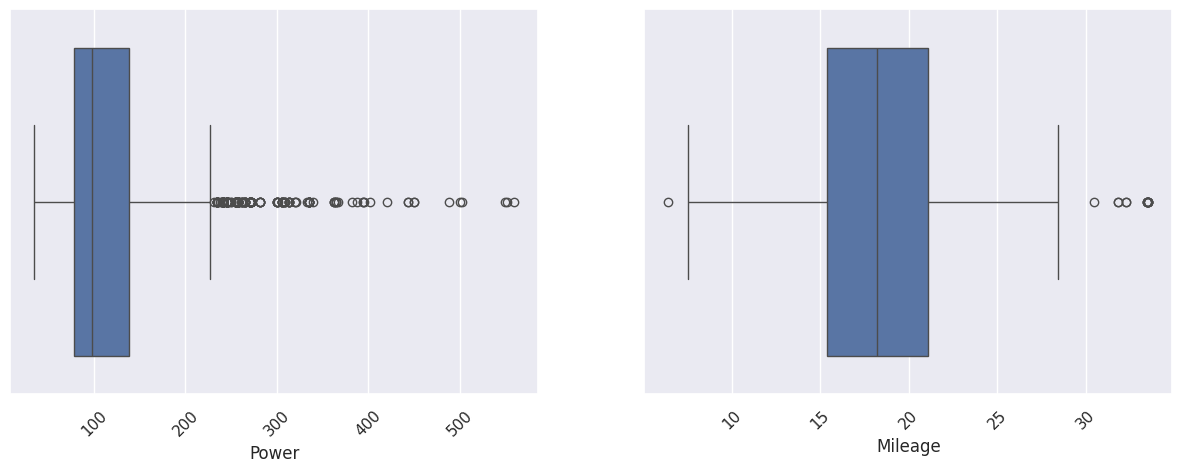

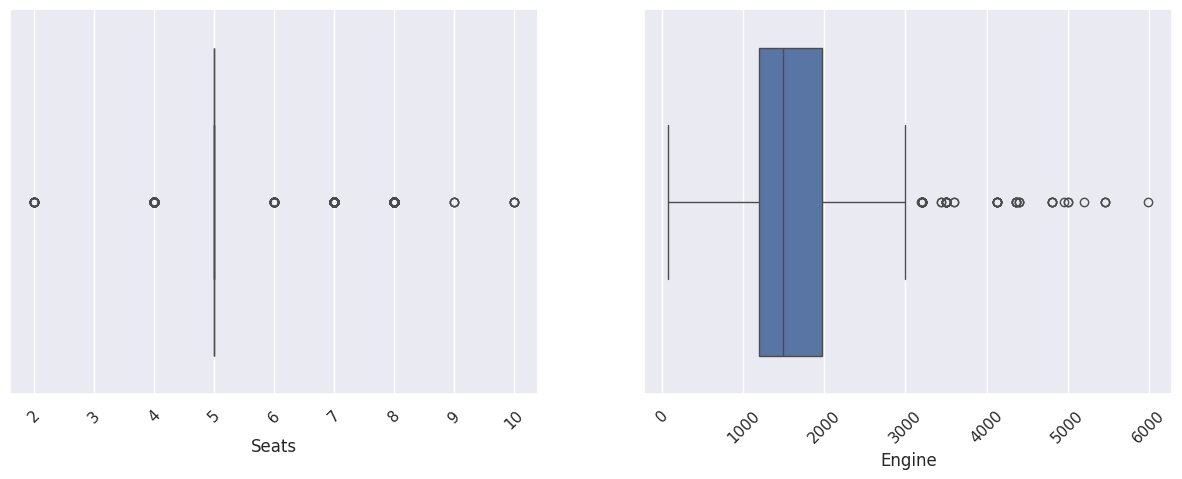

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000'),
  Text(800000.0, 0, '800000'),
  Text(900000.0, 0, '900000')])

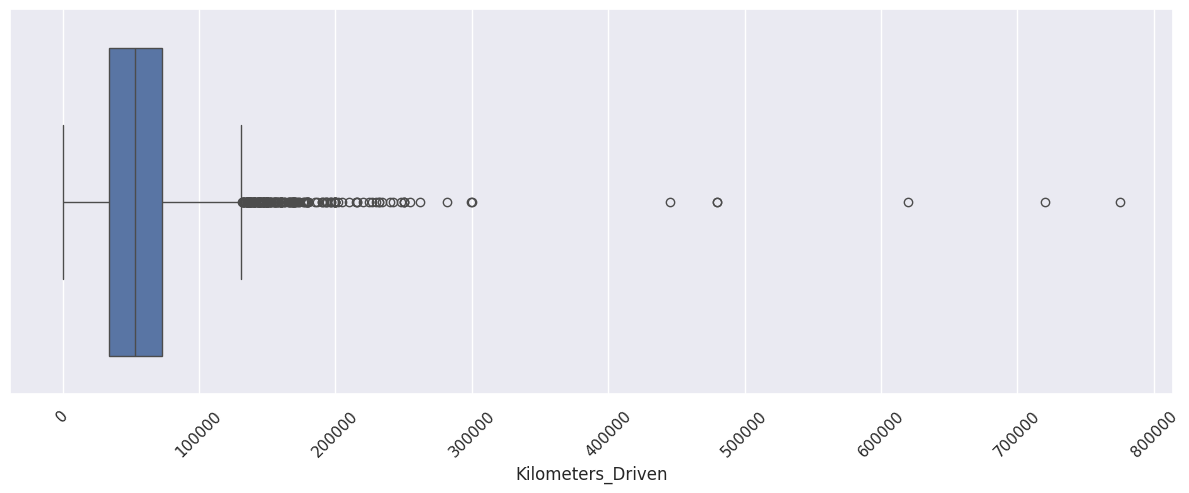

In [74]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Power")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Mileage")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Seats")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Engine")
plt.xticks(rotation=45)

plt.show()
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="Kilometers_Driven")
plt.xticks(rotation=45)


In [69]:
# Assign differently imputed values to different columns
# Checking missing values before imputation
print("Power null values: ", df['Power'].isnull().sum())
print("Engine null values: ", df['Engine'].isnull().sum())
print("Mileage null values: ", df['Mileage'].isnull().sum())
print("Seats null values: ", df['Seats'].isnull().sum())
print("Kilometers_Driven null values: ", df['Kilometers_Driven'].isnull().sum())

# Median imputation (safe for pandas 3.0)
df['Power'] = df['Power'].fillna(df['Power'].median())
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df['Seats'] = df['Seats'].fillna(df['Seats'].median())
df['Kilometers_Driven'] = df['Kilometers_Driven'].fillna(df['Kilometers_Driven'].median())

# Missing value check after imputation
print("\nCheck null values after imputation\n")
print(df.isnull().sum())

Power null values:  0
Engine null values:  0
Mileage null values:  0
Seats null values:  0
Kilometers_Driven null values:  0

Check null values after imputation

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Name_Brand           0
dtype: int64


In [75]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,3,Tier2,2804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,57667.272138,37875.683713,171.0,34000.0,53000.0,73000.0,775000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,18.340598,4.151148,6.4,15.4,18.2,21.1,33.54
Engine,6019.0,NaN,NaN,NaN,1620.509221,599.635458,72.0,1198.0,1493.0,1969.0,5998.0
Power,6019.0,NaN,NaN,NaN,112.883539,53.283701,34.2,78.0,97.7,138.03,560.0
Seats,6019.0,NaN,NaN,NaN,5.277621,0.803479,2.0,5.0,5.0,5.0,10.0


##**6. visualize the data**

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   float64 
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   float64 
 10  New_Price          6019 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Name_Brand         6019 non-null   category
dtypes: category(5), float64(7), int64(1)
memory usage: 406.6 KB


In [77]:
# save all imputed values in df dataframe and copy df to a new data frame df1 for further processing
df1 = df.copy()


## Univariate Analysis

In [78]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


###Price

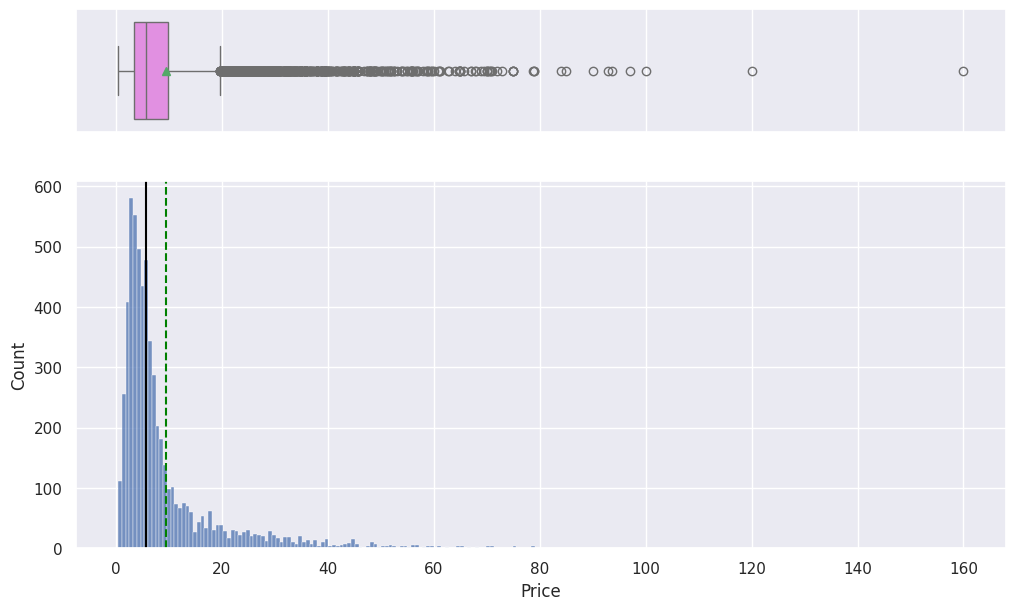

In [79]:
histogram_boxplot(df1, "Price")


- The price distribution is highly skewed towards right
- There are many outliners after 20 lakh INR. This might depend on other features of the car.
- There few extreme outliners after 120 lakh Price
- We have to treat these outliners to have better model

###New_Price

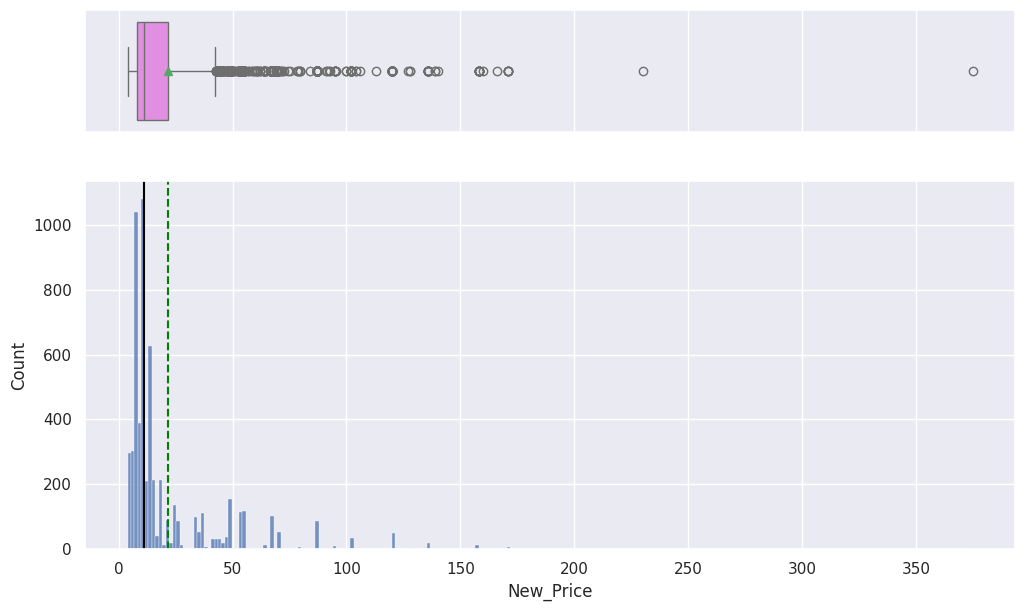

In [80]:
histogram_boxplot(df1, "New_Price")


/tmp/ipython-input-1015456965.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


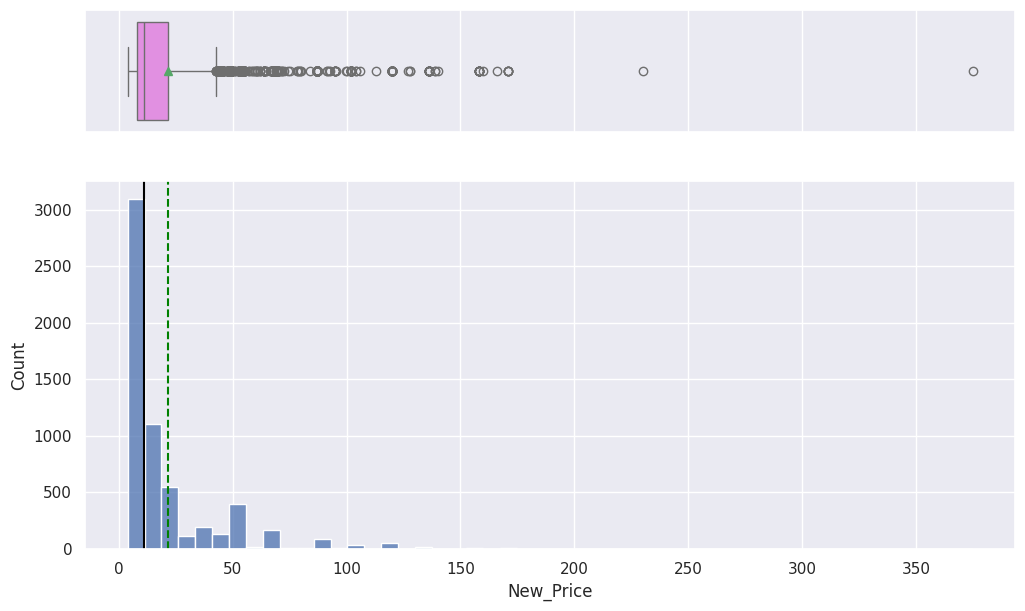

In [81]:
#applying bin for better visualization
histogram_boxplot(df1, "New_Price", bins=50)


- The distribution is heavily right-skewed
- Most of the cars below 40 lakhs and lot of outliners after that.
- There are few extreme outliners after 350 lakh New_Price
- out of range price depends on Engine, Mileage , Power and other features

###Seats

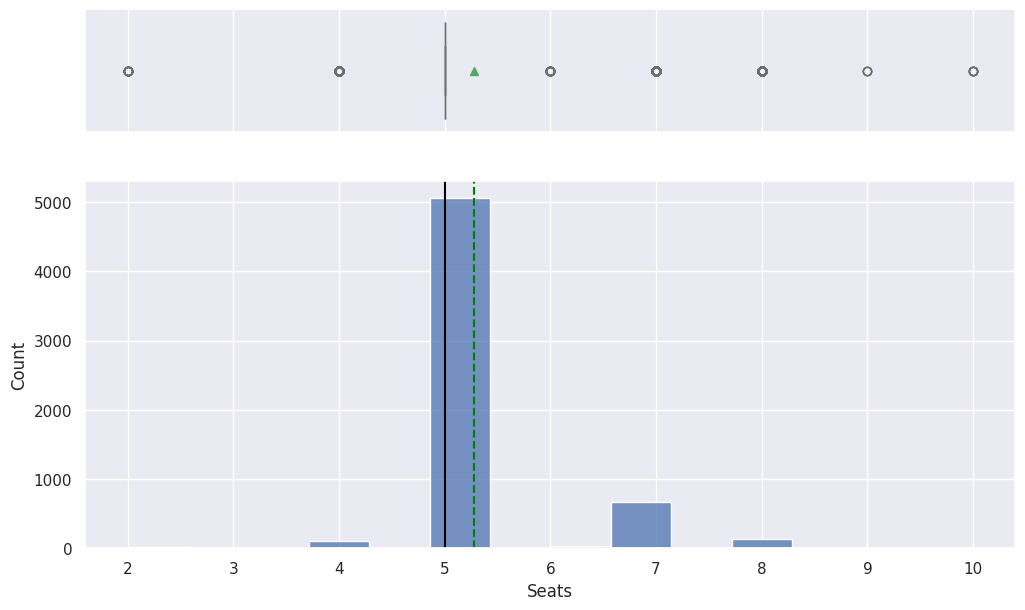

In [82]:
histogram_boxplot(df1, "Seats")


In [83]:
df['Seats'].value_counts()


,count
Seats,
5.0,5057
7.0,674
8.0,134
4.0,99
6.0,31
2.0,16
10.0,5
9.0,3


- Most of cars are 5 seaters
- few outliners and values are very discreate

###Power

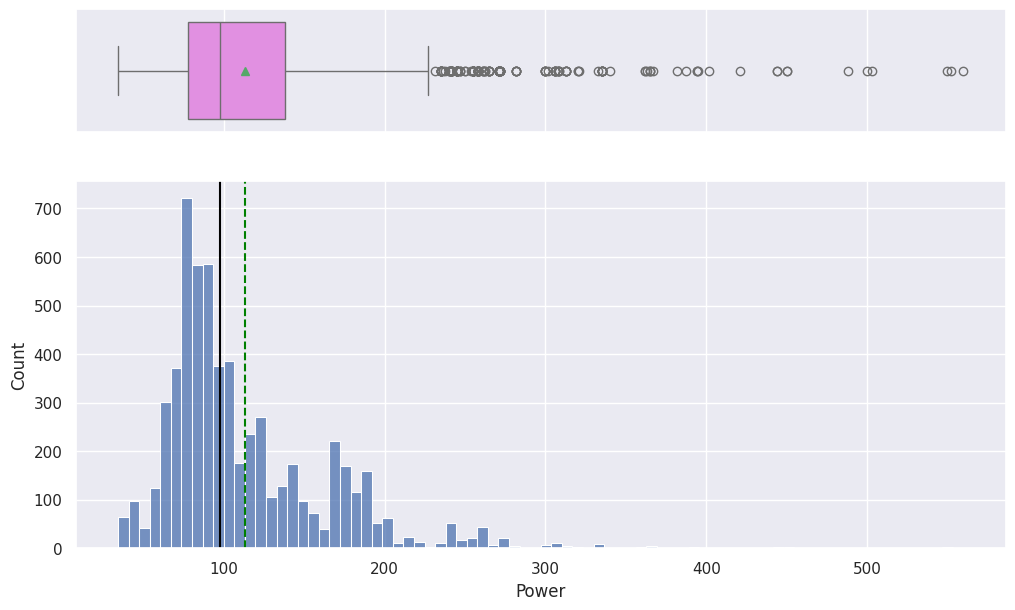

In [84]:
histogram_boxplot(df1, "Power")


- The distribution is heavily right-skewed, and most of the cars between 50 to 200 bhp
- Power column is right skewed with some outliners

###Engine

/tmp/ipython-input-1015456965.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


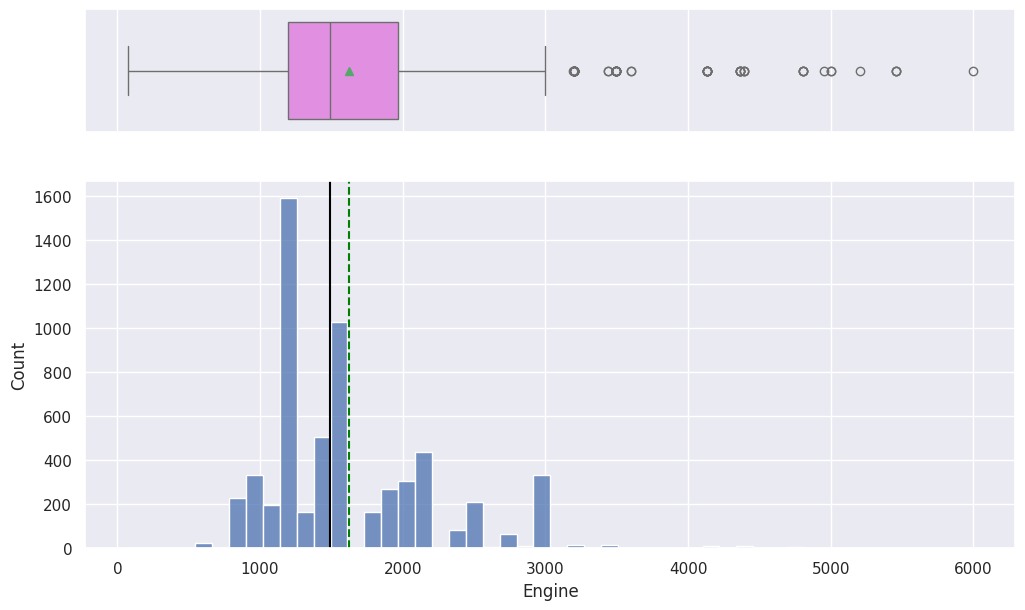

In [85]:
histogram_boxplot(df1, "Engine", bins=50)


- The distribution is lightly right-skewed.
- After 3000 CC the values are considered as outliners.
- Most of the cars have Engine CC between 1000 and 1500

###Milage

/tmp/ipython-input-1015456965.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


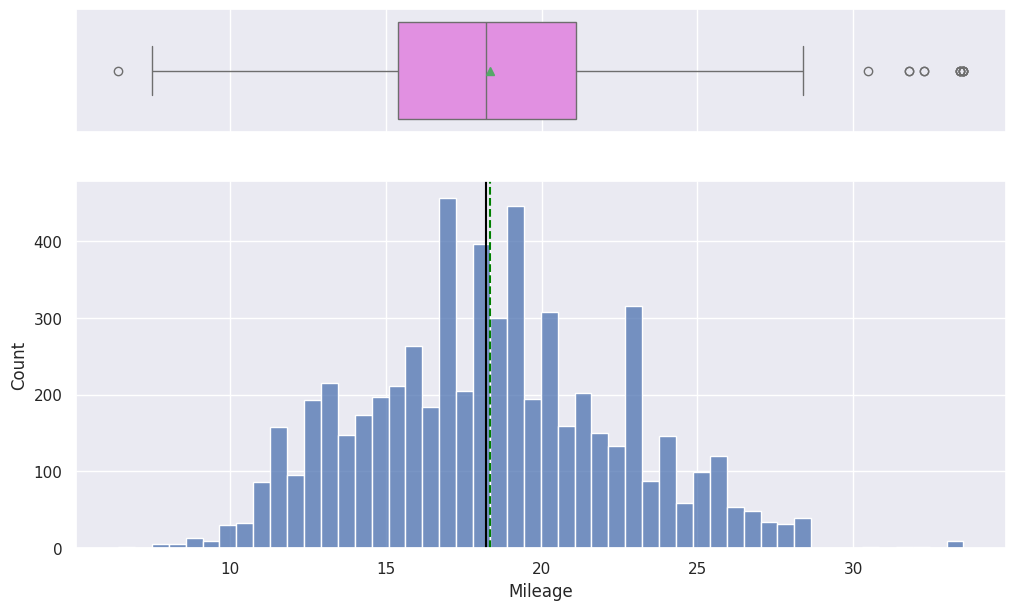

In [86]:
histogram_boxplot(df1, "Mileage", bins=50)


- The distribution is right-skewed. Most of the cars with in Mileage of 10 to 28
- there are few very outliners (less mileage cars and also very high mileage)

###Kilometers_Driven

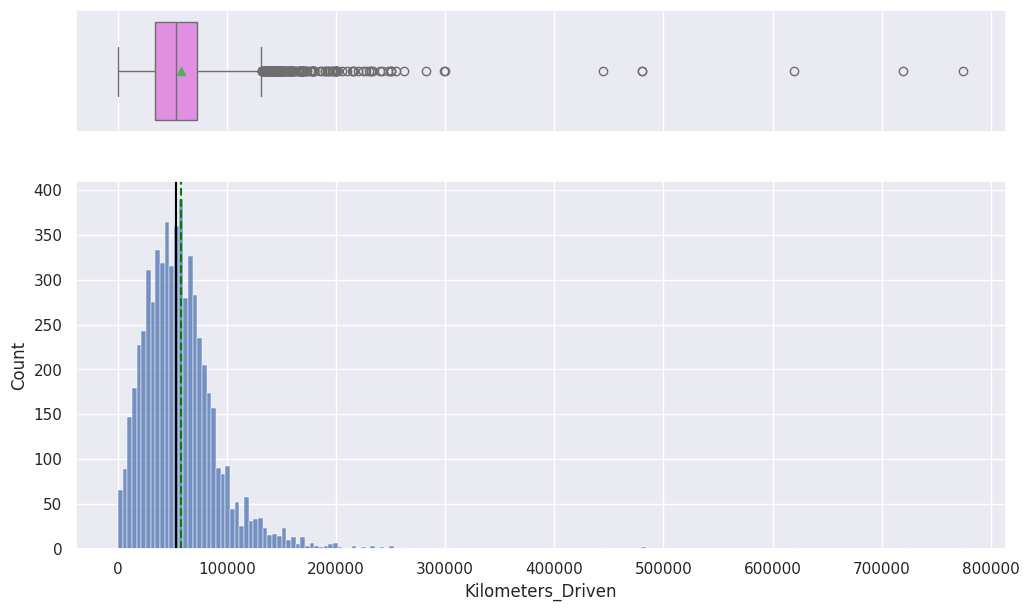

In [87]:
histogram_boxplot(df, 'Kilometers_Driven',)


- Kilometers_Driven distribution is right-skewed.
- Most of the data between 1000 to 200K

###Year

/tmp/ipython-input-1015456965.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


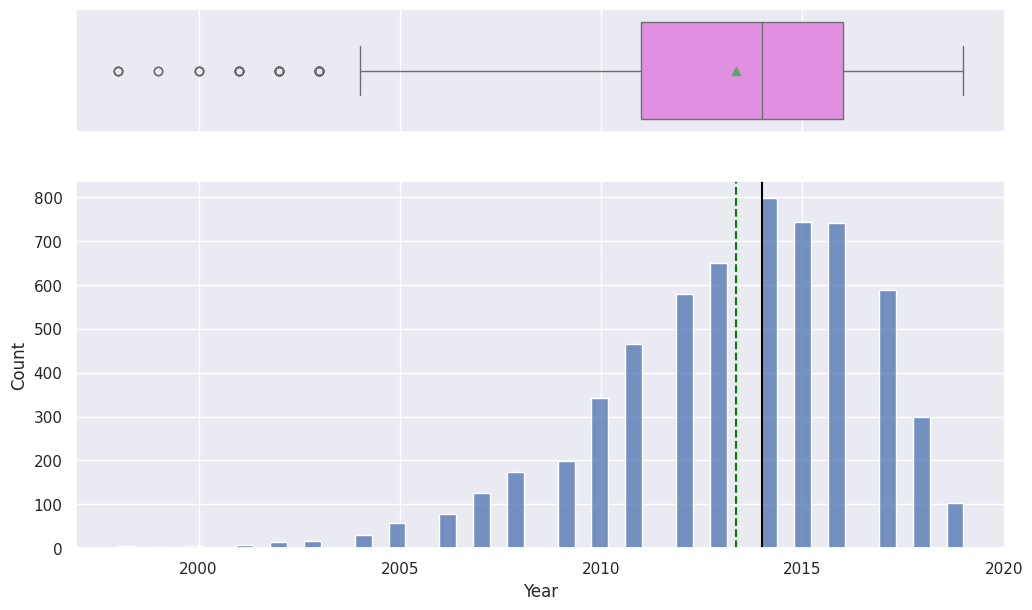

In [88]:
histogram_boxplot(df1, "Year", bins=50)


- The Year distribution is left skewed.
- Most of the data between 2005 to 2019

In [89]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


###Location

/tmp/ipython-input-2959008328.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


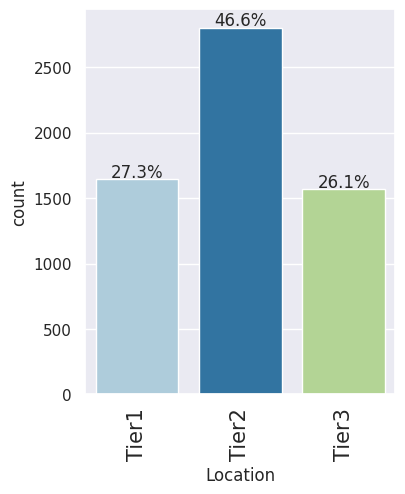

In [90]:
labeled_barplot(df1, "Location", perc=True)


- Most of the cars are Tier2 (Categerized based on average price in cities)

/tmp/ipython-input-2959008328.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


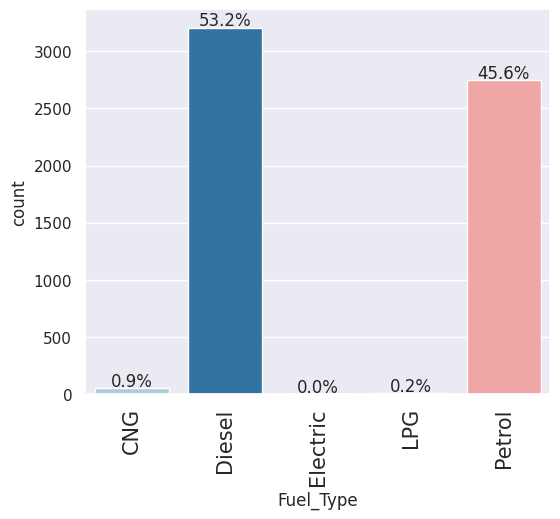

In [91]:
labeled_barplot(df1, "Fuel_Type", perc=True)


- Most of the cars are Fuel_Type Diesel followed by Petrol
- very few cars(2) are of electric

/tmp/ipython-input-2959008328.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


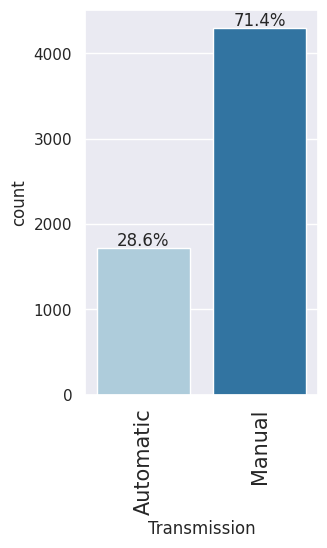

In [94]:
labeled_barplot(df1, "Transmission", perc=True)


- Majority of the cars are Manual Transmission

/tmp/ipython-input-2959008328.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


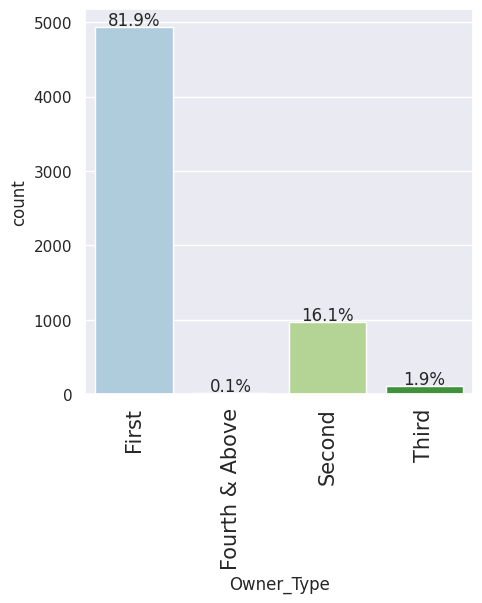

In [95]:
labeled_barplot(df1, "Owner_Type", perc=True)


- Majority of the cars are First Owner_Type

/tmp/ipython-input-2959008328.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


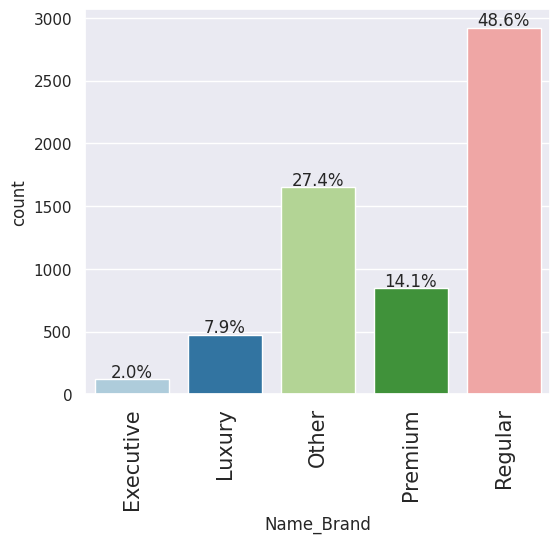

In [96]:
labeled_barplot(df1, "Name_Brand", perc=True)


- Most of the cars Name_Brand Regular which is categerized by average price
- Regular cars are more effordable

##Bivariate analysis

In [99]:
# creating a list of non-tag columns
corr_cols = [item for item in df1.columns]
print(corr_cols)


['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Name_Brand']


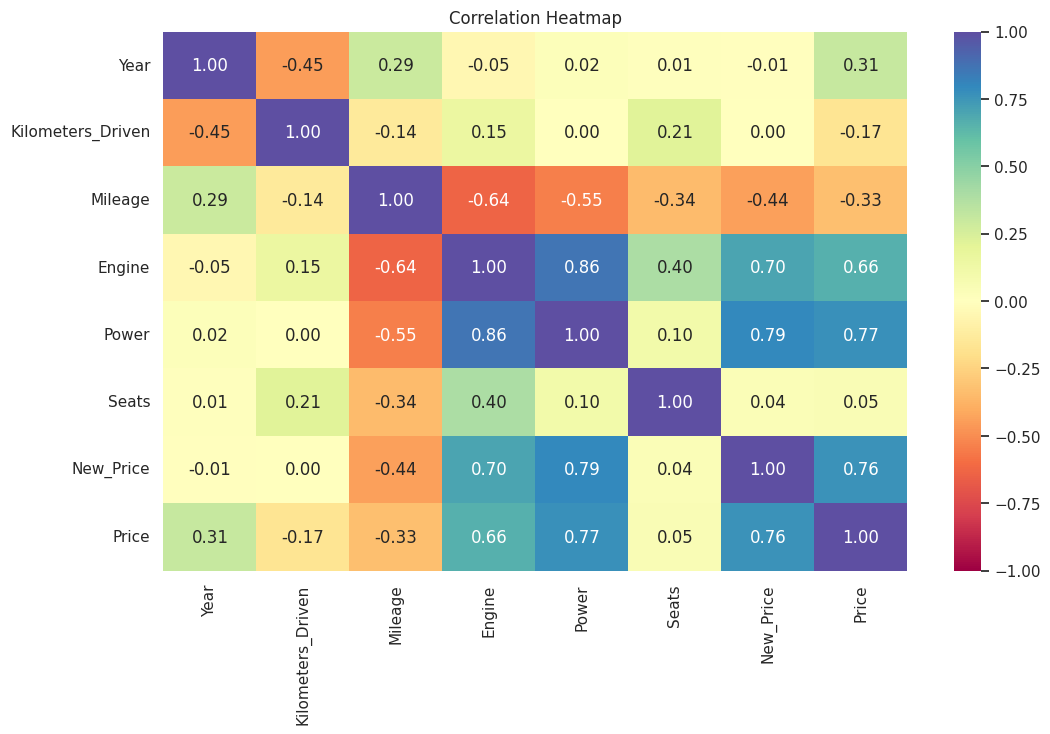

In [102]:
corr_df = df1[corr_cols].select_dtypes(include='number')
plt.figure(figsize=(12, 7))
sns.heatmap(
    corr_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Heatmap")
plt.show()

High Positive Correlation between

- Power - Engine follwed by New Price,Price
- Price - Power follwed by New_Price

High Negative Correlation between

- Mileage - Engine followed by Power

Other Noticable correlation

- Year have high positive correlation with Price
- Seats have high positive correlation with Engine
- Price have high negetive correlation with Mileage-

##Let's check the variation in Price with some of the categorical columns in our data

###Name_Brand vs Price

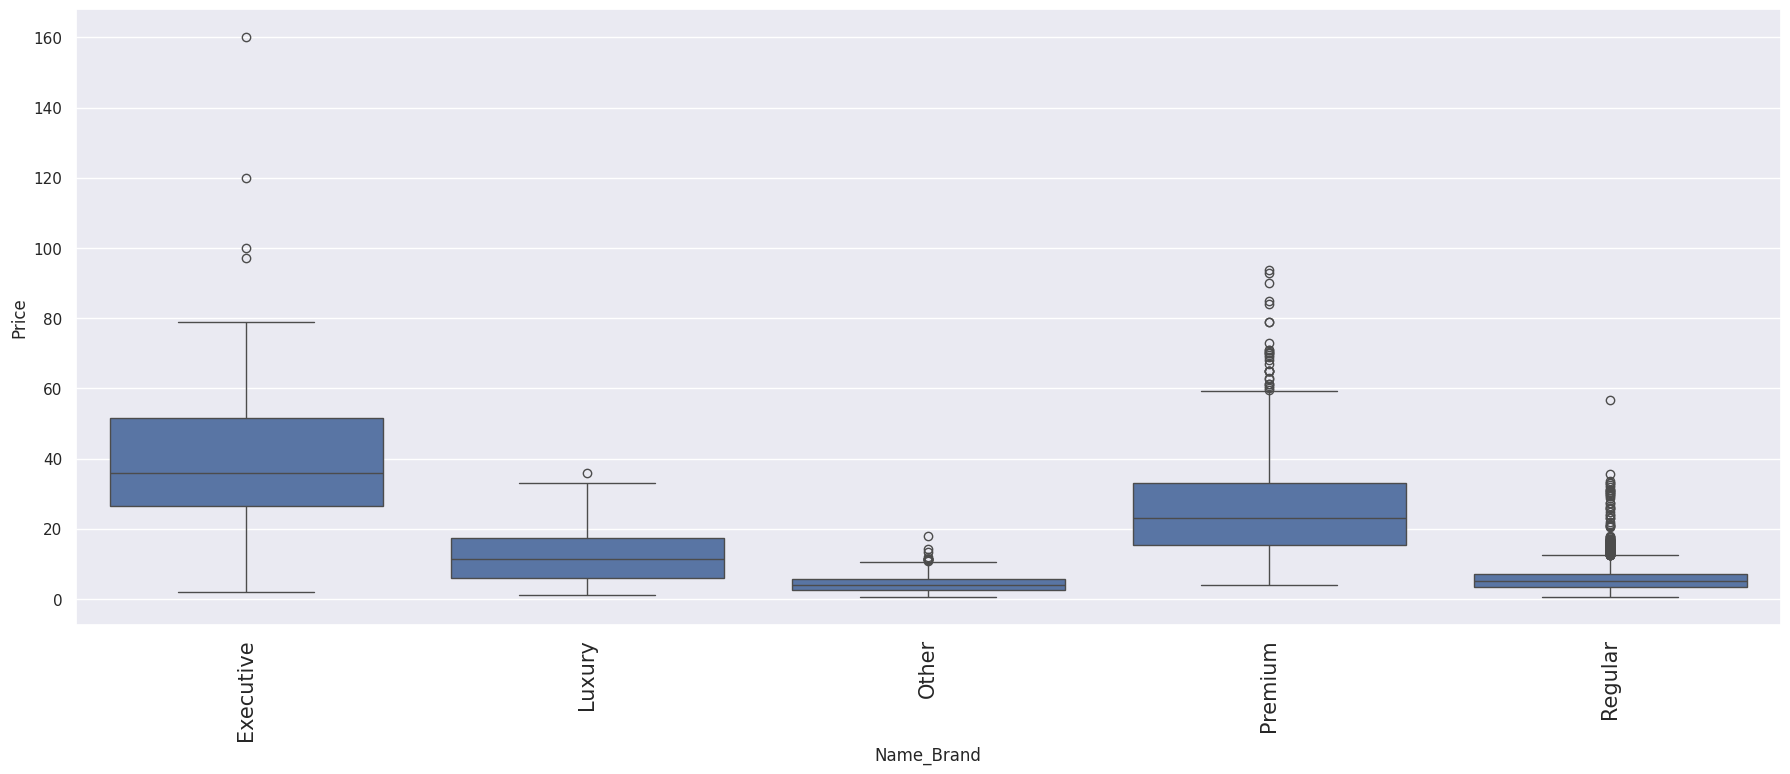

In [103]:
plt.figure(figsize=(22, 8))
sns.boxplot(x="Name_Brand", y="Price", data=df1)
plt.xticks(rotation=90, fontsize=15)
plt.show()


/tmp/ipython-input-452758355.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price=df1.groupby(['Name_Brand'])['Price'].mean().fillna(0).sort_values(ascending= False).index


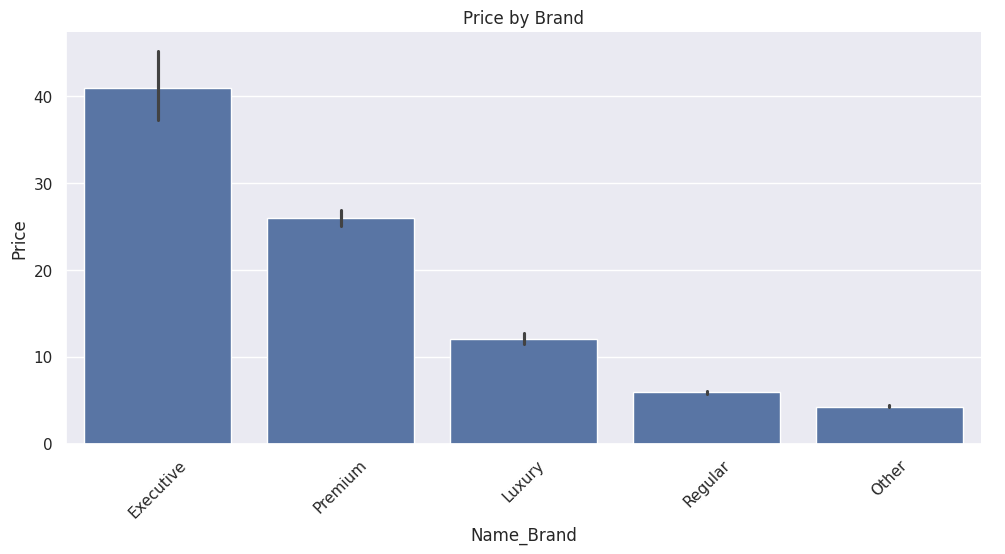

In [104]:
#Average price of cars by brand and sorting in descending order
mean_price=df1.groupby(['Name_Brand'])['Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot
sns.catplot(x="Name_Brand", y="Price", data=df1, kind='bar',  aspect=2, order=mean_price).set(title='Price by Brand')
plt.xticks(rotation=45);


- Executive Cars are most expensive follwed by Premium

###Owner_Type vs Price

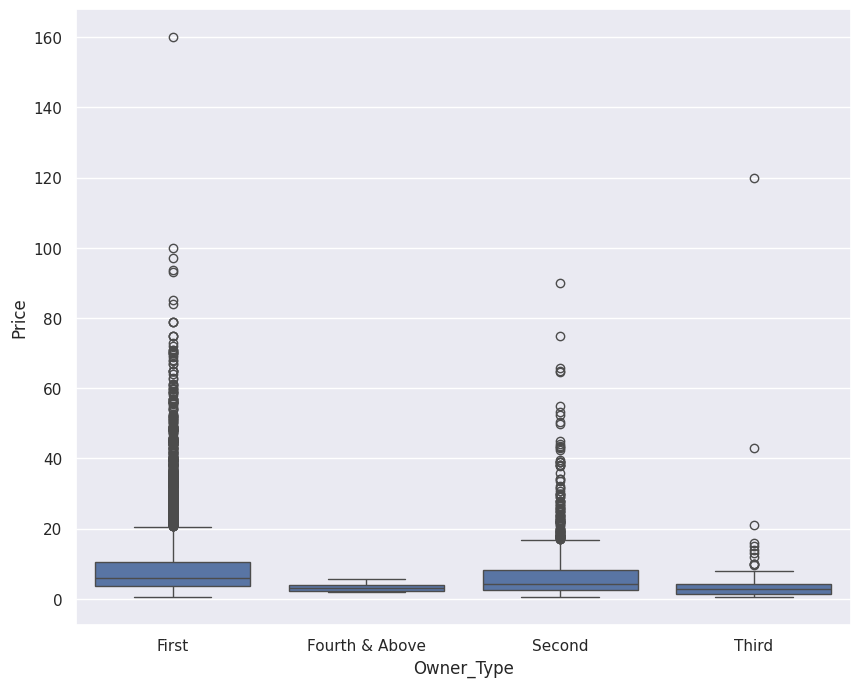

In [105]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Owner_Type", y="Price", data=df1)
plt.show()


/tmp/ipython-input-1629648046.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price=df1.groupby(['Owner_Type'])['Price'].mean().fillna(0).sort_values(ascending= False).index


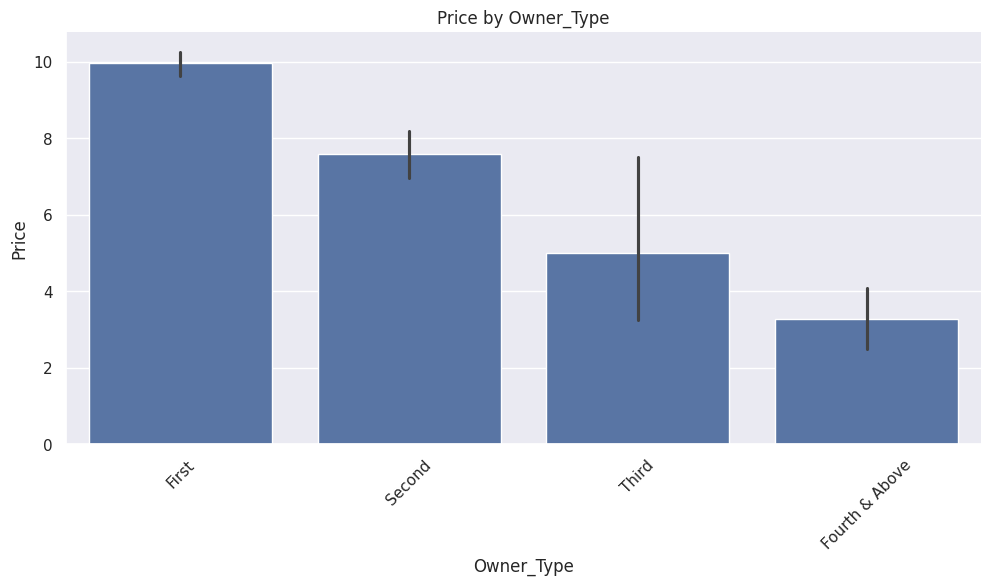

In [106]:
#Average price of cars by Owner and sorting in descending order
mean_price=df1.groupby(['Owner_Type'])['Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot
sns.catplot(x="Owner_Type", y="Price", data=df1, kind='bar',  aspect=2, order=mean_price).set(title='Price by Owner_Type')
plt.xticks(rotation=45);


- Most of the Cars are First Owner_Type(New) and also highly First Owner_type are high Priced cars

###Fuel_Type vs Price

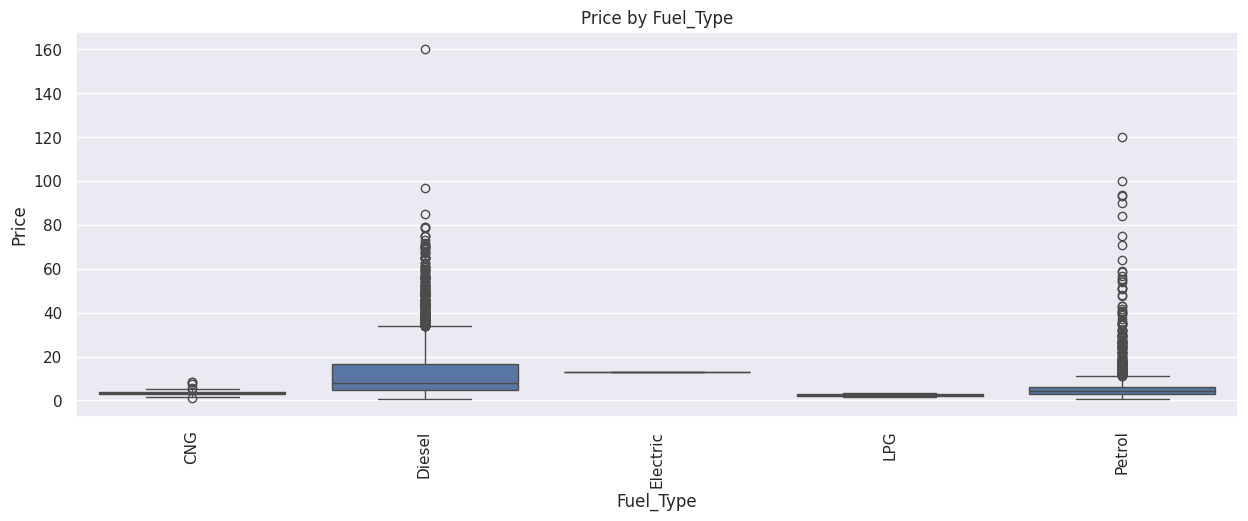

In [107]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df1).set(title='Price by Fuel_Type')
plt.xticks(rotation=90)
plt.show()


-Most of the cars are Diesel Type
- on average Diesel and Petrol cars are highly priced

###Transmission vs Price

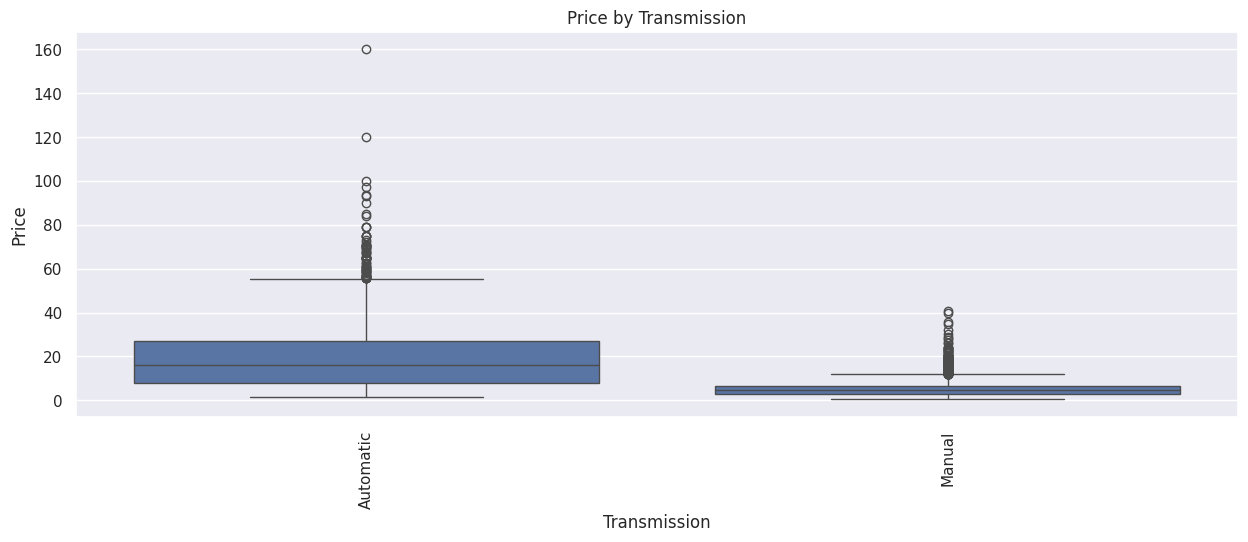

In [108]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="Transmission", y="Price", data=df1).set(title='Price by Transmission')
plt.xticks(rotation=90)
plt.show()


- Automatic Cars Priced very higher than Manual

###Highly correlated numeric columns

####Power vs Price

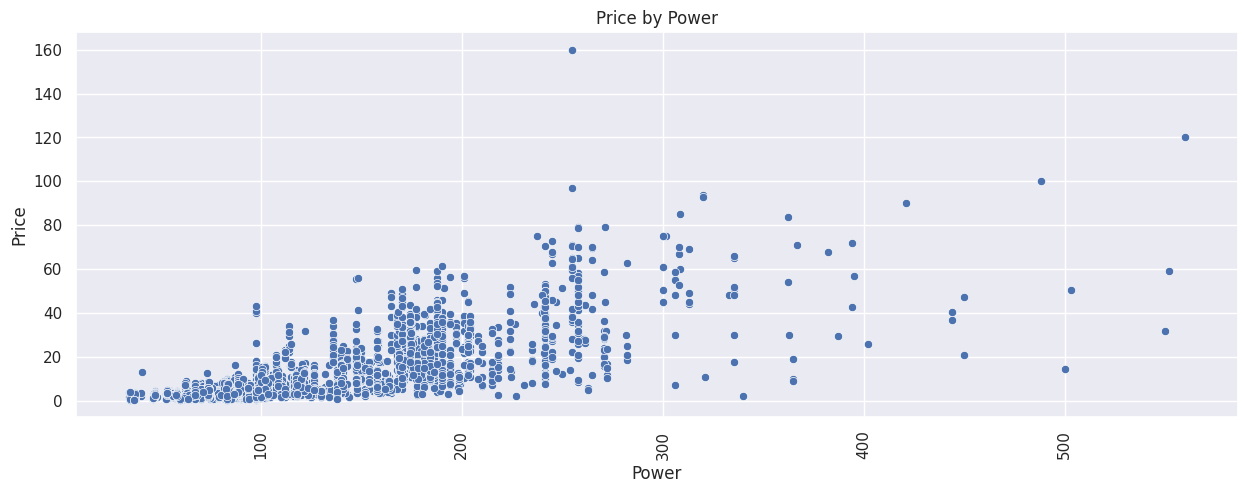

In [109]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x="Power", y="Price", data=df1).set(title='Price by Power')

plt.xticks(rotation=90)
plt.show()


- As the Power increases the Price increases

####Engine vs Price

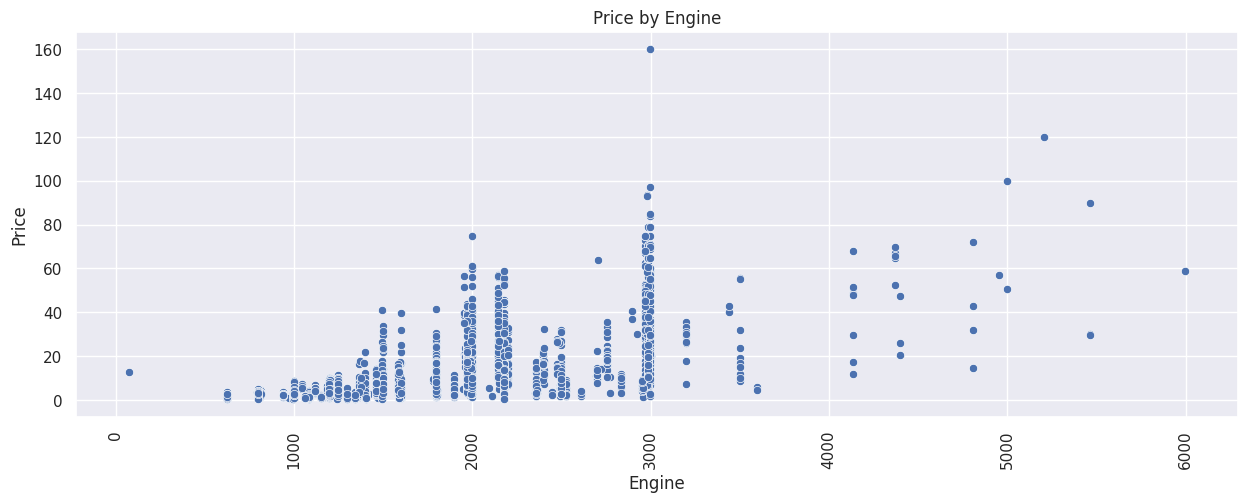

In [110]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x="Engine", y="Price", data=df1).set(title='Price by Engine')

plt.xticks(rotation=90)
plt.show()


- Cars with high CC engine are costly compared to low CC
- As more the engine CC more the price.

####Year vs Price

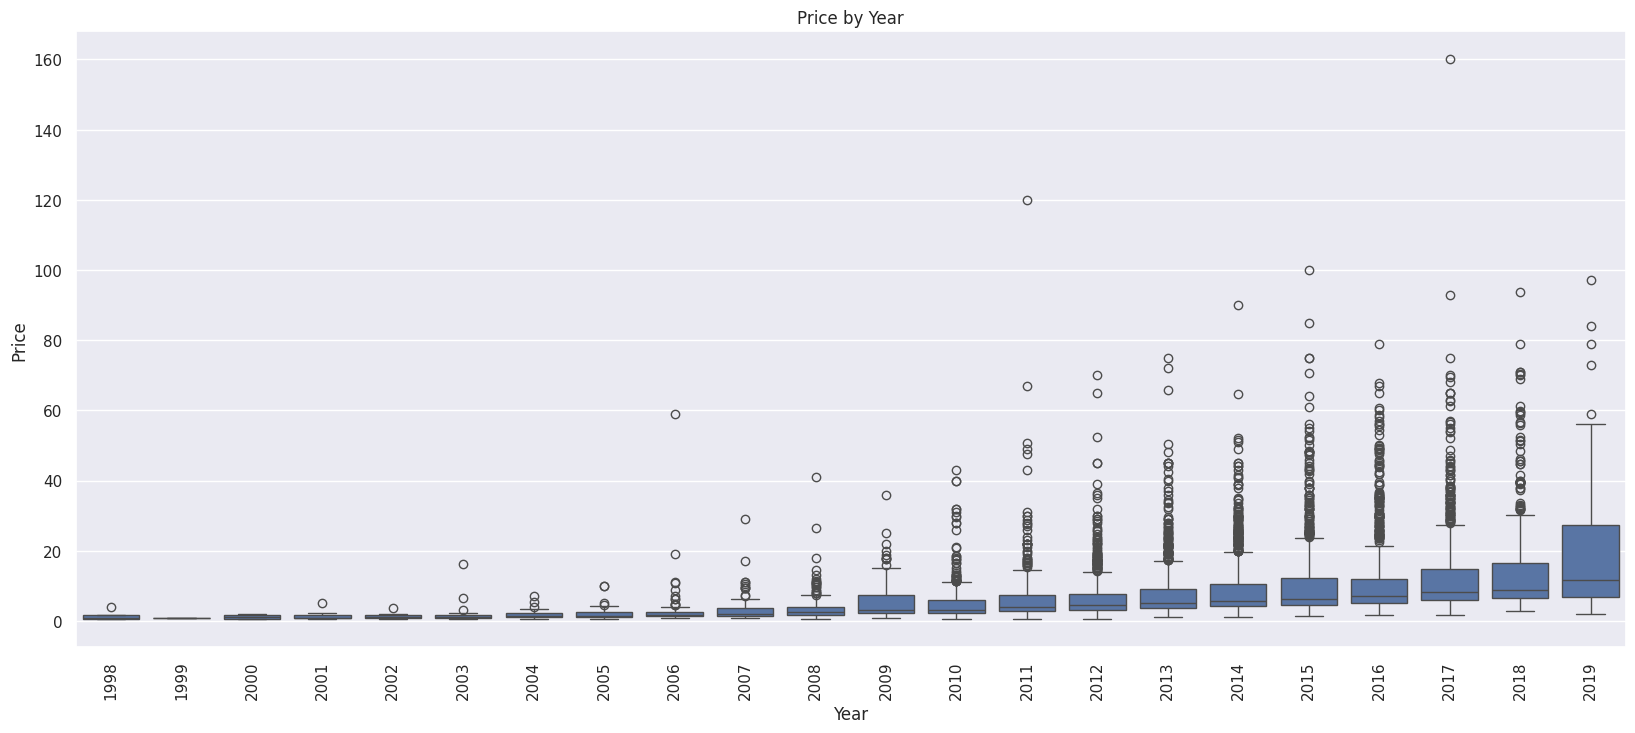

In [111]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="Year", y="Price", data=df1).set(title='Price by Year')

plt.xticks(rotation=90)
plt.show()


- Price of the used cars increased over years
- there is a big difference of price range from 2012 to 2019

####Seats vs Price

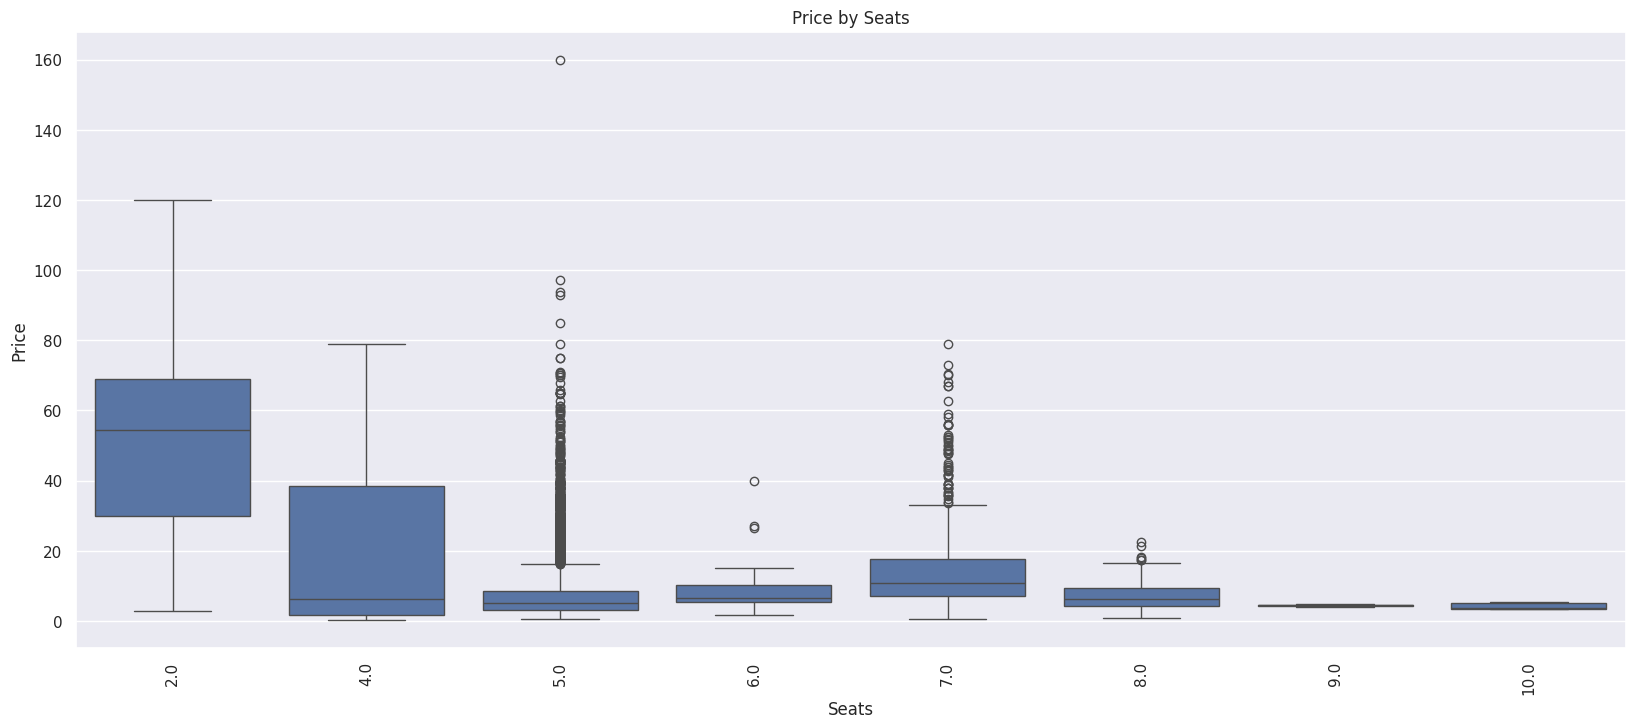

In [112]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="Seats", y="Price", data=df1).set(title='Price by Seats')

plt.xticks(rotation=90)
plt.show()


- 2 seater used cars are costlier
- Most of the cars are 5 seaters with variable price

##Multivariate analysis

###Price vs Year vs Transmission

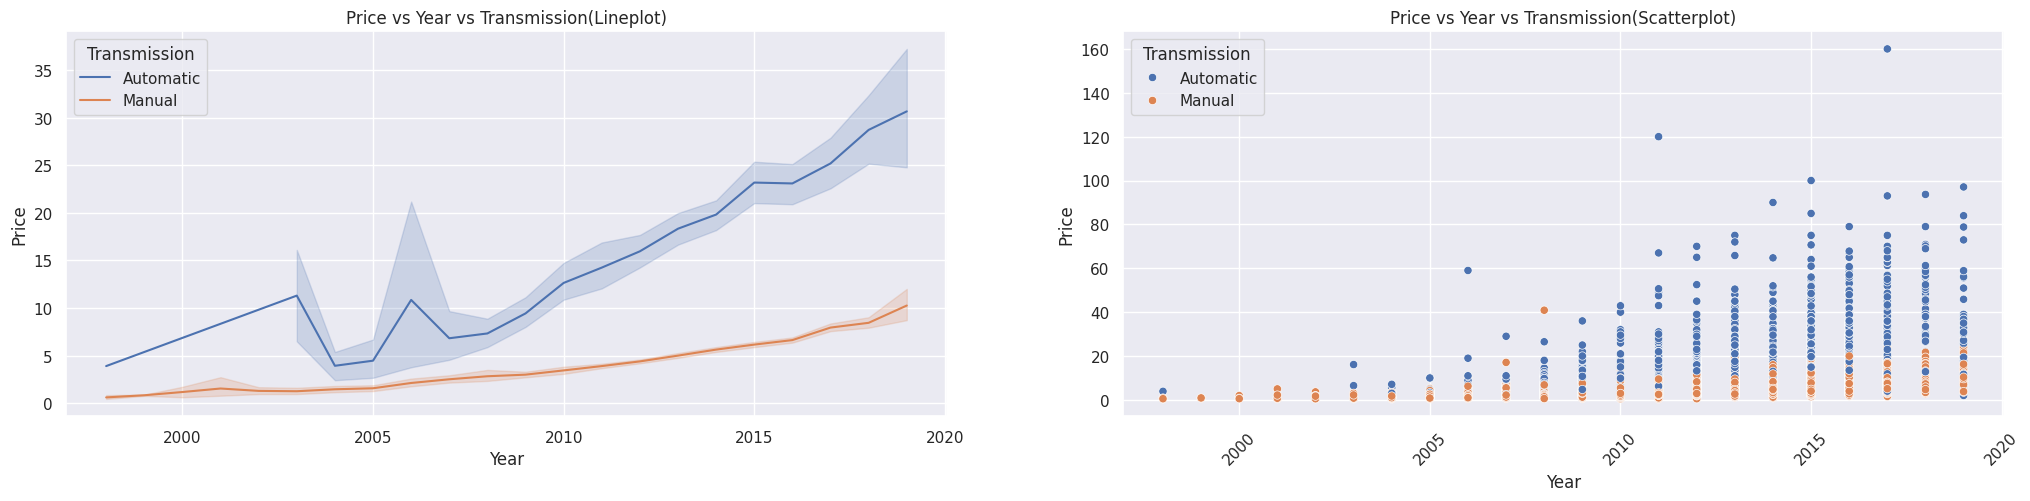

In [113]:
# Lets visualize the relationships
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='Price',hue='Transmission',data=df1).set(title='Price vs Year vs Transmission(Lineplot)')
plt.subplot(1, 2, 2)
sns.scatterplot(y='Price', x='Year', hue='Transmission', data=df1).set(title='Price vs Year vs Transmission(Scatterplot)')
plt.xticks(rotation=45)
plt.show()


- Price of Automatic cars have increased a lot over years

###Price vs Power vs Transmission

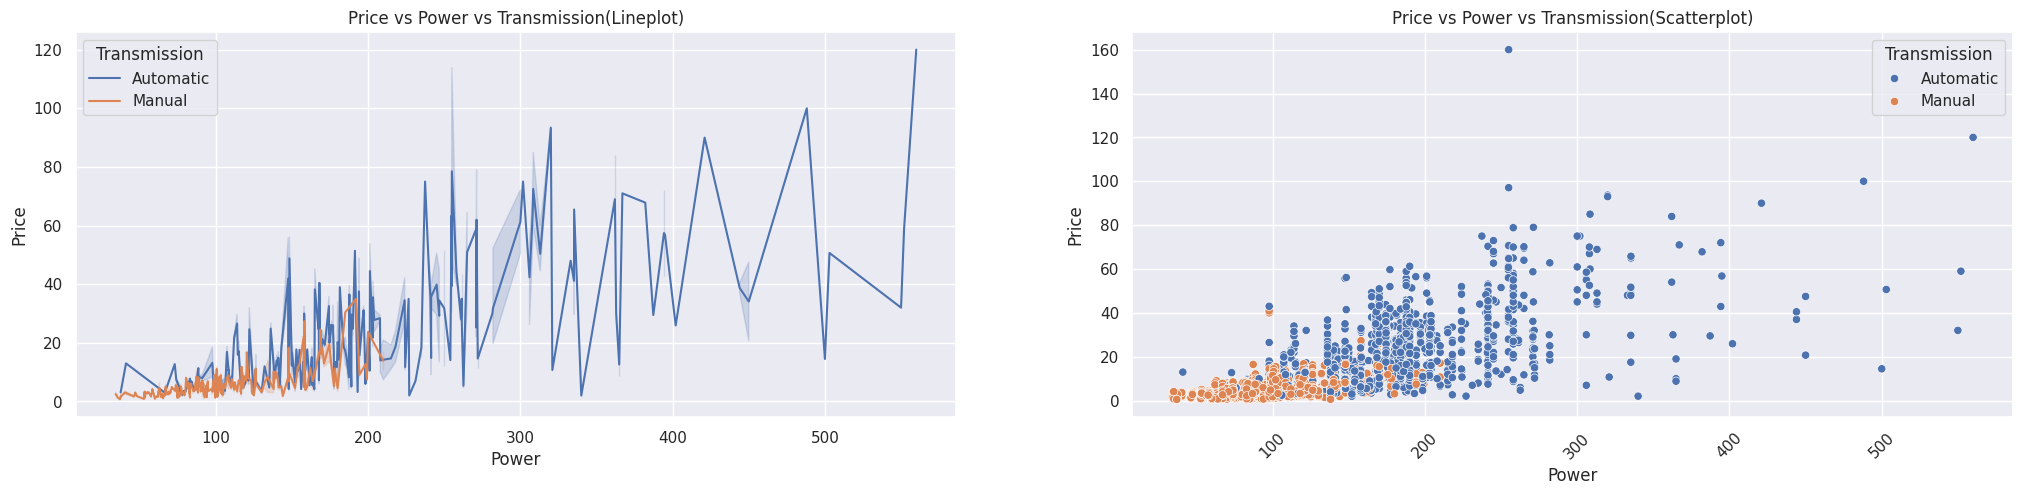

In [114]:
# Lets visualize the relationships
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x='Power', y='Price',hue='Transmission',data=df1).set(title='Price vs Power vs Transmission(Lineplot)')
plt.subplot(1, 2, 2)
sns.scatterplot(y='Price', x='Power', hue='Transmission', data=df1).set(title='Price vs Power vs Transmission(Scatterplot)')
plt.xticks(rotation=45)
plt.show()


- As Power increases, Price of Automatic used cars increases high compared to Manual

###Price vs Miliage vs Transmission

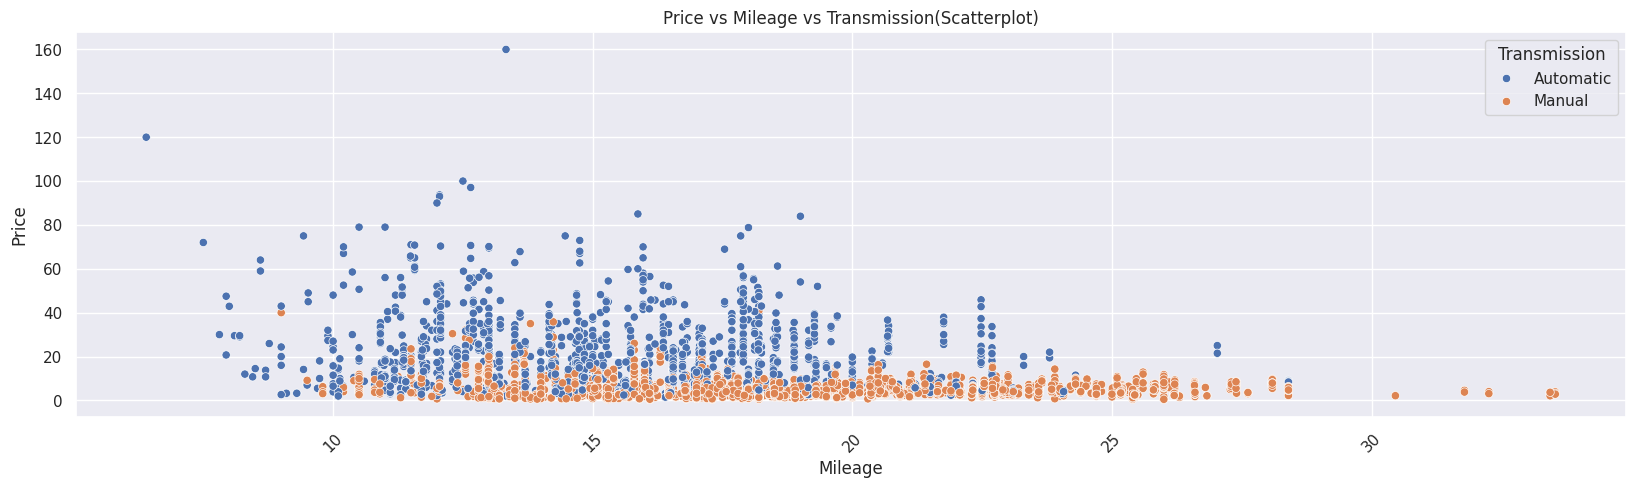

In [115]:
# Lets visualize the relationships
plt.figure(figsize=(20, 5))
sns.scatterplot(y='Price', x='Mileage', hue='Transmission', data=df1).set(title='Price vs Mileage vs Transmission(Scatterplot)')
plt.xticks(rotation=45)
plt.show()


- Price varies for Automatic used cars with Mileage
- Price of Automatic cars very higher than Manual

##**7. Summary of EDA**

**Data Description:**

- The target variable (Price) is of float type.
- There are total 7253 rows and 14 columns.
- There are 3 float type, 3 int type and 8 object type columns in the data.
- There are no duplicate values in the data.
- There are a few of missing values in the data including in Target column Price
- The most used car name Mahindra XUV500 W8 2WD
- Mumbai is the most used location.
- There is a wide range of Kilometers_driven from 171 to 6500000
- Diesel is the most used Fuel_Type.
- Manual is the majority Transmission and First* is the majority Owner_Type
- New_Price and Price have a wide price range

**Data Preprocessing:**

- The S.No. column dropped for modeling as they are ulplicate column to represent unique index
- The Name column was split with space as column Name_Brand and converted to category
- The Fuel_Type,Owner_Type,Transmission and Location columns were converted to category
- The Mileage,Power,Engine columns units were dropped and converted to float
- The column Mileage have data with 0 values which were converted and treated as null values
- The Kilometers_Driven column have one record bad data with 6500000 which treated as null value
- The columns Name_Brand and Location values categerized into few values bases on average price(Feature Engineering).
- There are 73 cars where New_Price < Price(Used car Price)
  - Most of the above data have Owner_Type as "First" which means those cars are NEW, 5 Second Owner_Type and 1 Third with Owner_Type and Car Brand is Lamborghini
  - These high priced used care are considered as vintage cars and prices have raised so much.
  - As manufacturing of product reduces the price of the popular cars increases as people demand to buy
  - These values can be considered as valid differences.
- The missing values in the data are treated as follows:
  - Missing values in the target variable Price were dropped as its not encouraged to impute target variable data(1234 rows).
  - Missing values in numerical columns Mileage,Power, Seats,Engine, Kilometers_Driven were all had skewed distribution, so imputed all these columns missing values with Median
- After missing value treatement and dropping null target column rows, we have 6019 rows and 13 columns

**Observations from EDA:**

- Price: The distribution is highly skewed towards right. There are many outliners after 20 lakh INR. This might depend on other features of the car. Price have high positive correlation with Power followed by New_Price and Engine. and also high negative corr with Mileage.
  - As Power increases Price of the used car increases
  - As Engine CC increases Price increases and Cars with high CC engine are costly compared to low CC
  - Car year also have some positive corr as past few years cars priced more than old cars
- New_Price: The distribution is heavily right-skewed.Most of the cars below 40 lakhs and lot of outliners after that range.There are few extreme outliners after 350 lakh New_Price and these depends on Engine, Mileage , Power and other features. New_Price also have high positive correlation with Power followed by Price and Engine. and also high negative corr with Mileage.
- Seats: Most of cars are 5 seaters with few outliners and values are very discreate. 2 seater used cars are more pricey
- Power: The distribution is heavily right-skewed, and most of the cars between 50 to 200 bhp. Power have high corr with Engine.
  - As Engine CC increases, horsepower increases
- Engine: The distribution is slightlyright-skewed. After 3000 CC the values are considered as outliners. Engine have high corr with Power.
- Mileage: The distribution is slightly right-skewed. Most of the cars with in Mileage of 10 to 28. Mileage have high negetive corr with Price
- Owner_Type: Majority of the cars are First(New) Owner_Type and also highly priced
- Fuel_Type: Most of the cars are Fuel_Type Diesel followed by Petrol and very few cars(2) are of electric.
- Transmission: Majority of the cars are Manual Transmission. Most expensive cars are Automatic.
- Kilometers_driven: Kilometers_Driven distribution is right-skewed. Most of the data between 1000 to 200K kmpl
- Year: The Year distribution is left skewed. Most of the used cars between 2005 to 2019. Price of the used cars increased over years
- Location: Most of the cars are Tier2 (Categerized based on average price in cities)
- Name_Brand: 48.6%of the cars Name_Brand are Regular which is categerized by average price. Regular cars are more affordable

##**8. Outliers Treatment**

- An outlier is a data point that is distant from other similar points.

- Outliers in the data can distort predictions and affect the accuracy so it's important to flag them for review. This is especially the case with regression models.

**Outlier detection using IQR**

- One way to flag points as outliers is to compute the IQR, which is the interval going from the 1st quartile to the 3rd quartile of the data in question, and then flag a point for investigation if it is outside 1.5 * IQR..

In [117]:
#Save treated data and copy data frame for further processing
dflr=df1.copy()


**Skewness of Numerical Data**

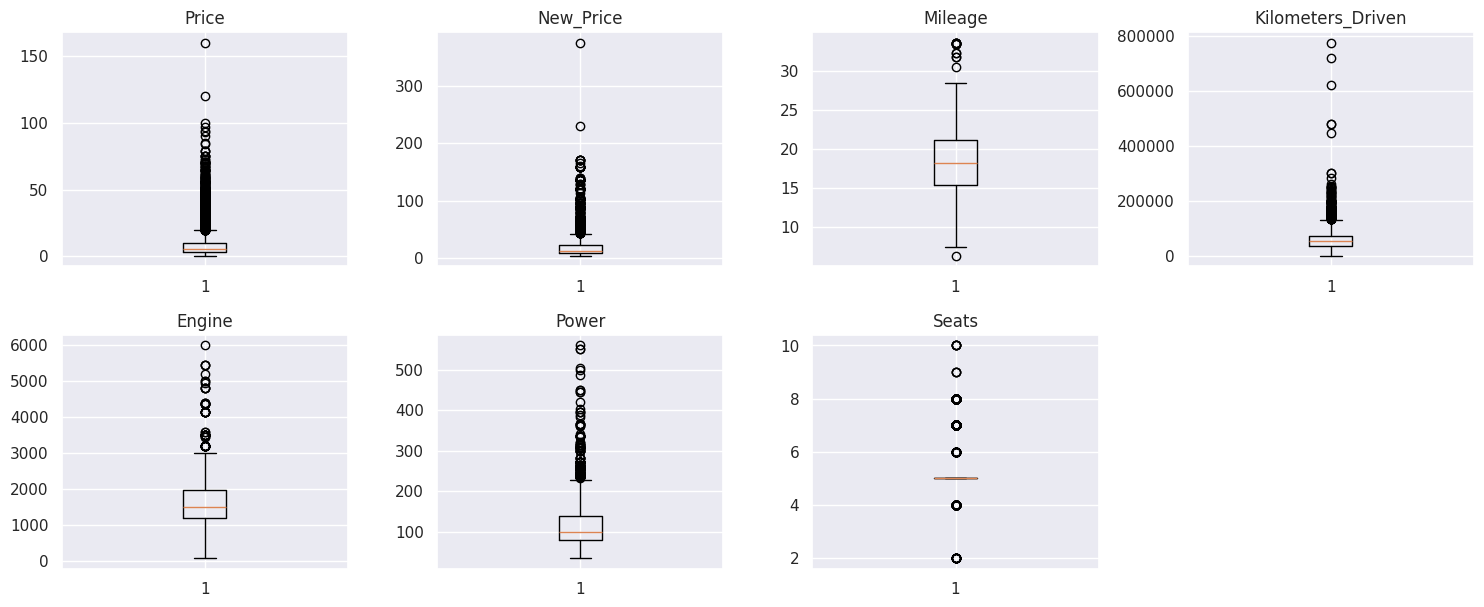

In [118]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Price', 'New_Price', 'Mileage', 'Kilometers_Driven','Engine', 'Power', 'Seats']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(dflr[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


Let's find the percentage of outliers, in each column of the data, using IQR.

In [119]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = dflr[numeric_columns].quantile(0.25)
Q3 = dflr[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

# Percentage of outliers in each column
((dflr[numeric_columns] < lower_whisker) | (dflr[numeric_columns] > upper_whisker)).sum()/dflr.shape[0]*100


,0
Price,11.928892
New_Price,15.351387
Mileage,0.249211
Kilometers_Driven,3.339425
Engine,1.013457
Power,3.970759
Seats,15.982721


In [120]:
#Method to treat outliners flooring and capping
def treat_outliers(dflr, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = dflr[col].quantile(0.25)  # 25th quantile
    Q3 = dflr[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    dflr[col] = np.clip(dflr[col], lower_whisker, upper_whisker)

    return dflr


In [121]:
# Looping through the data and applying the function "treat_outliers"
for n in numeric_columns:
   dflr = treat_outliers(dflr,n)

# Percentage of outliers in each column
((dflr[numeric_columns] < lower_whisker) | (dflr[numeric_columns] > upper_whisker)).sum()/dflr.shape[0]*100


,0
Price,0.0
New_Price,0.0
Mileage,0.0
Kilometers_Driven,0.0
Engine,0.0
Power,0.0
Seats,0.0


After outliner Treatement 



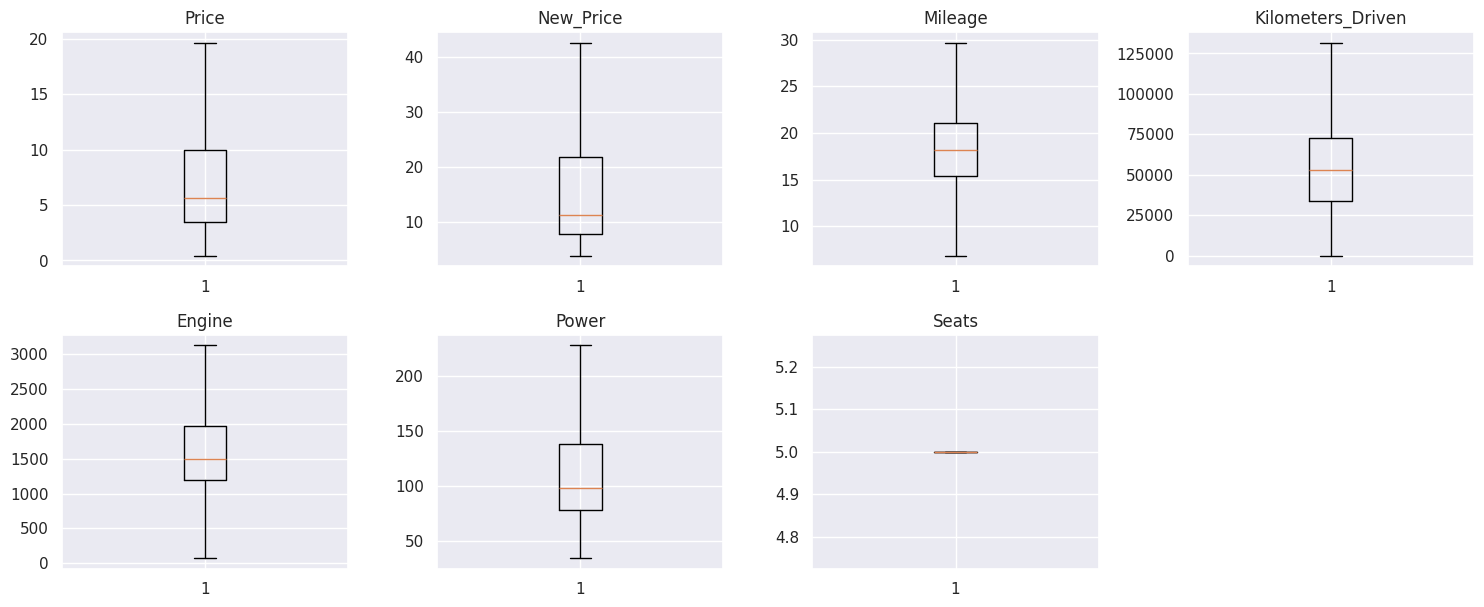

In [122]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(dflr[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
print("After outliner Treatement \n")
plt.show()


- Distribution looks fine above and cannot consider any entry as outlier which may impact the model.

##**9. Model Building**

- Define independent and dependent variables

In [123]:
#Price is the dependent variable
X = dflr.drop(["Price"], axis=1)
y = dflr["Price"]


- Creating dummy variables

In [124]:
#Create dummy variables for all category columns (Location, Fuel_Type, Owner_Type, Name_Brand and Transmission)
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Location_Tier2,Location_Tier3,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Name_Brand_Luxury,Name_Brand_Other,Name_Brand_Premium,Name_Brand_Regular
0,2010,72000.0,26.60,998.0,58.16,5.0,5.510,True,False,False,False,False,False,True,False,False,False,False,True,False,False
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.060,False,True,True,False,False,False,True,False,False,False,False,False,False,True
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.610,True,False,False,False,False,True,True,False,False,False,False,False,False,True
3,2012,87000.0,20.77,1248.0,88.76,5.0,11.270,True,False,True,False,False,False,True,False,False,False,False,True,False,False
4,2013,40670.0,15.20,1968.0,140.80,5.0,42.605,False,False,True,False,False,False,False,False,True,False,False,False,True,False


###Split the data into train and test

-70% and 30%

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [126]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])


Number of rows in train data = 4213
Number of rows in test data = 1806


###Fitting a linear model

In [127]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)


LinearRegression()

###Model performance check

- We will be using metric functions defined in sklearn for RMSE, MAE, and  R2

- We will define functions to calculate adjusted  R2
  and MAPE.
  - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

- We will create a function that will print out all the above metrics in one go.

In [128]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [129]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf


Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.933922,1.410154,0.885762,0.885189,32.335755


In [130]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.766009,1.320018,0.909635,0.908571,29.089095


####Get model coefficients

In [131]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df


,Coefficients
Year,5.605817e-01
Kilometers_Driven,-1.095351e-05
Mileage,-1.008692e-01
Engine,-2.155922e-04
Power,3.170277e-02
Seats,2.386980e-15
New_Price,1.651871e-01
Location_Tier2,-4.097298e-01
Location_Tier3,-8.182840e-01
Fuel_Type_Diesel,9.308001e-01


- A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.
  - Ex: As power increases the Price of used car increases
- A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
  - Ex: As Kilometers_Driven increases Price of Used cars decreases

**Automate the equation of the fit**

In [132]:
# Let us write the equation of linear regression

Equation = "Price = " + str(lin_reg_model.intercept_)
print(Equation, end=" ")

for i in range(len(x_train.columns)):
    if i != len(x_train.columns) - 1:
        print(
            "+ (",
            lin_reg_model.coef_[i],
            ")*(",
            x_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", lin_reg_model.coef_[i], ")*(", x_train.columns[i], ")")


Price = -1120.895351609457 + ( 0.5605817027001653 )*( Year )  + ( -1.0953506005507597e-05 )*( Kilometers_Driven )  + ( -0.10086916538733987 )*( Mileage )  + ( -0.00021559217957268064 )*( Engine )  + ( 0.03170277397227046 )*( Power )  + ( 2.3869795029440866e-15 )*( Seats )  + ( 0.16518710958810034 )*( New_Price )  + ( -0.40972979478115235 )*( Location_Tier2 )  + ( -0.8182839600707312 )*( Location_Tier3 )  + ( 0.9308001496824599 )*( Fuel_Type_Diesel )  + ( 4.6151705598728086 )*( Fuel_Type_Electric )  + ( 0.9730976931890483 )*( Fuel_Type_LPG )  + ( -0.5604181833962287 )*( Fuel_Type_Petrol )  + ( -0.7455755463913518 )*( Transmission_Manual )  + ( -1.1623868003948454 )*( Owner_Type_Fourth & Above )  + ( -0.26150602916812515 )*( Owner_Type_Second )  + ( -0.09380472582205528 )*( Owner_Type_Third )  + ( -1.4649304736894724 )*( Name_Brand_Luxury )  + ( -3.1921841850763055 )*( Name_Brand_Other )  + ( -1.3333917826185455 )*( Name_Brand_Premium )  + ( -3.5683854558870727 )*( Name_Brand_Regular )


**Observations**

- The train and test  R2
  are 0.88 and 0.90, indicating that the model explains 88% and 90% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict price of used cars within a mean error of 1.32 on the test set.

- MAPE of 29.08 on the test data means that we are able to predict within ~29% of the used car prices

- The overall performance is good

##**10: Model with Forward Feature Selection using SequentialFeatureSelector**

In [133]:
!pip install -U mlmachine==0.1.5
!pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00


In [134]:
#We'll use forward feature selection on all the variables
#import sklearn.external.joblib as joblib
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    6.6s finished

[2026-01-12 04:08:19] Features: 1/21 -- score: 0.6988944750826145[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished

[2026-01-12 04:08:20] Features: 2/21 -- score: 0.8441939922286779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.4s finished

[2026-01-12 04:08:22] Features: 3/21 -- score: 0.8631002475840879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.7s finished

[2026-01-12 04:08:23] Features: 4/21 -- score: 0.8675455381790789[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    0.7s remaining:

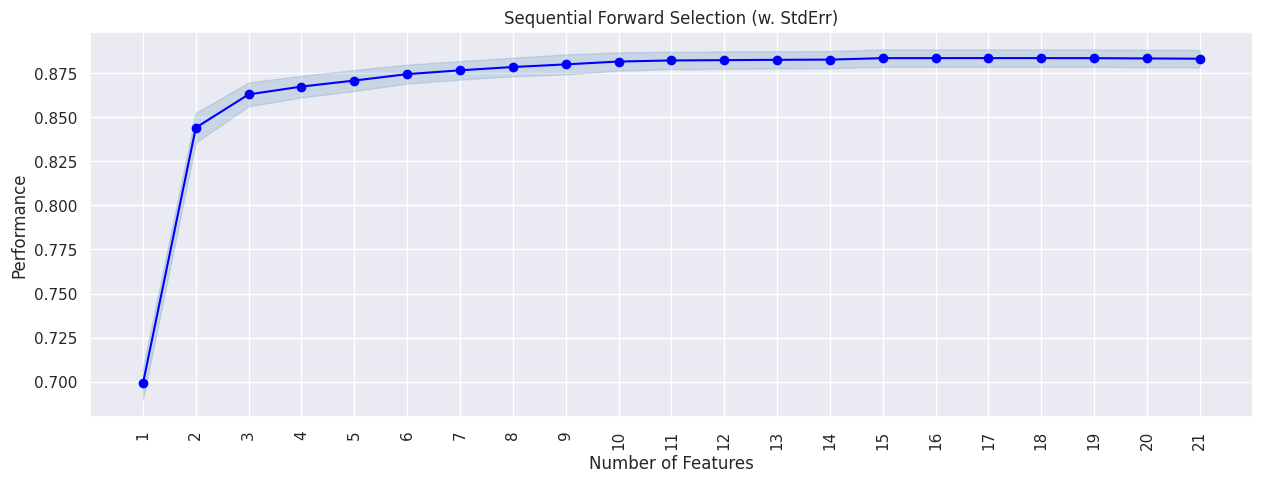

In [135]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()


- We can see that performance increases till the 10th feature and then slowly becomes constant. The decision to choose the k_features now depends on the adjusted R2 vs the complexity of the model.
- The increase in adjusted R2 is not very significant as we are getting the same values with a less complex model.
- So we'll use 12 features only to build our model, but you can experiment by taking a different number. Number of features chosen will also depend on the business context and use case of the model.

In [136]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=12,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.4s finished

[2026-01-12 04:09:32] Features: 1/12 -- score: 0.6988944750826145[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished

[2026-01-12 04:09:33] Features: 2/12 -- score: 0.8441939922286779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2026-01-12 04:09:33] Features: 3/12 -- score: 0.8631002475840879[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2026-01-12 04:09:34] Features: 4/12 -- score: 0.8675455381790789[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.5s finished



In [137]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
# let us look at the names of the important features
x_train.columns[feat_cols]


[0, 1, 2, 4, 6, 7, 8, 9, 12, 13, 18, 20]


Index(['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'New_Price',
       'Location_Tier2', 'Location_Tier3', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Name_Brand_Other',
       'Name_Brand_Regular'],
      dtype='object')

In [138]:
x_train_final = x_train[x_train.columns[feat_cols]]
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]


In [139]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)


LinearRegression()

In [140]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf


Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.946994,1.413716,0.884212,0.883881,32.598659


In [141]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.773215,1.320726,0.908896,0.908286,29.223557


In [142]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,1.933922,1.946994
MAE,1.410154,1.413716
R-squared,0.885762,0.884212
Adj. R-squared,0.885189,0.883881
MAPE,32.335755,32.598659


In [143]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df


Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,1.766009,1.773215
MAE,1.320018,1.320726
R-squared,0.909635,0.908896
Adj. R-squared,0.908571,0.908286
MAPE,29.089095,29.223557


**Observations**

- The new model (lin_reg_model2) uses little more than half the number of features as the previous model (lin_reg_model).
- The performance of the new model, however, is very close to our previous model.
- Depending upon time sensitivity and storage restrictions, we can choose between the models.
- Overall performance of model 2 is good
- We will be moving forward with lin_reg_model as it shows better performance with little less RMSE and MAPE
- The lower the RMSE, the better the model and its predictions even its minute difference.

##**11. Conclusions**

- We were able to build multiple models to compare the performances and we will be moving forward with lin_reg_model as it shows better performance with little less RMSE and MAPE.
- The lower the RMSE, the better the model and its predictions even its minute difference.
- We have been able to build a predictive model that can be used by customers to predict the price of an used car with an $R^2$ of 0.88 on the training set.
- Customer can use this model to predict the used car price within a mean error of 1.32 on the test set.
- MAPE is 29.08% on test set.
- We can try more models by adding features. additional features helps to improve R^2 value of the model.v




##**12. Recomendations**


- Electric cars have positive impact on car price. Delears can acquire more Electric cars. It also helps to keep climate clean.
- Dealers can fill up their inventory with regular brands(based on average price) as they are on demand.
- Dealer can have more inventory in the locations Tier2(based on average price) as the used cars are in demand in those cities.
- Year has positive impact. Latest year made sell for more price.
- Dealers can offer discount for old cars and fill up the inventory with new ones as new ones sells faster.
- If we have extra data of festival sales, we can find out how festivals affect the sales.
- For customers its better to sell the car before  certain killometer to get better price on the car. As the price reduces as kilometer driven increases.

